# Feed Forward Neural Network

In [ ]:
import numpy as np

def ReLU(x):
  return np.maximum(0,x)

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

class SimpleFFN:
  def __init__(self, input_size, hidden_size, output_size):
    self.w1 = np.random.randn(input_size, hidden_size)
    self.b1 = np.random.randn(1, hidden_size)
    self.w2 = np.random.randn(hidden_size, output_size)
    self.b2 = np.random.randn(1, output_size)

  def forward(self, x):
    self.x1 = np.dot(x, self.w1) + self.b1
    self.A1 = ReLU(self.x1)
    self.x2 = np.dot(self.A1, self.w2) + self.b2
    self.output = softmax(self.x2)
    return self.output

model = SimpleFFN(4,5,3)
x = np.random.randn(10,4)
output = model.forward(x)
output

array([[2.15703562e-05, 2.73440861e-05, 5.19380134e-05],
       [3.09237432e-03, 2.78360841e-05, 2.15160877e-02],
       [1.26307594e-05, 4.95451264e-05, 4.76426853e-05],
       [8.43087371e-02, 4.34754890e-08, 8.61521703e-01],
       [7.71902516e-05, 3.08822147e-05, 5.71734574e-05],
       [3.72507324e-03, 4.73407832e-06, 1.17322634e-02],
       [6.09421870e-06, 2.29410870e-04, 3.00068636e-05],
       [6.45167240e-05, 3.61008939e-05, 5.44452001e-05],
       [1.19258022e-03, 3.39510723e-07, 1.03642739e-02],
       [5.23510435e-04, 1.64277458e-05, 1.17752445e-03]])

# FFNN Back-Propagation

## Cross Entropy Loss

- Binary Cross Entropy Loss


    L = -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

- Categorical Cross-Entropy Loss


    L = - sum( y_pred log(y_true))/n

In [ ]:
def BCELoss(y_true, y_pred):
  return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

def CrossEntropyLoss(y_true, y_pred):
  return -np.sum(y_true * np.log(y_pred))/y_true.shape[0]

In [ ]:
import numpy as np

y = 1
y_pred = 0.9

loss = BCELoss(y, y_pred)
print(f"Binary Cross-Entropy Loss: {loss:.4f}")

Binary Cross-Entropy Loss: 0.1054


In [ ]:
y = np.array([0, 1, 0])
y_pred = np.array([0.2, 0.7, 0.1])

loss = CrossEntropyLoss(y, y_pred)
print(f"Multi-Class Cross-Entropy Loss: {loss:.4f}")

Multi-Class Cross-Entropy Loss: 0.1189


## One-Hot Encoding

Multi-Class Problem

In [ ]:
n = 10 # 10 samples
m = 3  # 3 classes
y_true = np.random.randint(0, m, n)
print(y_true)

[1 2 1 0 2 2 1 1 1 1]


In [ ]:
def one_hot_encoding(y):
  n = y.shape[0] # and m => no. of classes
  one_hot = np.zeros((n,m))
  one_hot[np.arange(n),y] = 1
  return one_hot


y = one_hot_encoding(y_true)
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## ReLU derivative

In [ ]:
def ReLU_derivative(x):
  return np.where(x > 0, 1, 0)

## Back-Propagation

In [ ]:
n = 10 # 10 samples
m = 3  # 3 classes
y_true = np.random.randint(0, m, n)

model = SimpleFFN(4,5,m)
x = np.random.randn(n,4)
y_pred = model.forward(x)

def backward(y_true, y_pred):
  alpha = 0.01
  y = one_hot_encoding(y_true)
  loss = CrossEntropyLoss(y, y_pred)

  dx2 = y_pred - y
  dw2 = np.dot(model.A1.T, dx2)
  db2 = np.sum(dx2, axis=0, keepdims=True)

  dA1 = np.dot(dx2, model.w2.T)
  dx1 = dA1 * ReLU_derivative(model.x1)
  dw1 = np.dot(x.T, dx1)
  db1 = np.sum(dx1, axis=0, keepdims=True)

  model.w2-=alpha*dw2
  model.b2-=alpha*db2
  model.w1-=alpha*dw1
  model.b1-=alpha*db1

  return loss, (model.w2, model.b2), (model.w1, model.b1)

backward(y_true, y_pred)

(np.float64(5.684816975102548),
 (array([[ 0.99458941, -0.27208278,  0.19229214],
         [ 0.93776148, -0.1736534 , -0.21513211],
         [-1.36739417,  0.30140823, -0.29798691],
         [-0.1226925 , -0.57584618, -0.75132675],
         [ 1.01667715,  1.48149874, -0.64214848]]),
  array([[-0.12290782, -0.36141152, -0.87663467]])),
 (array([[-0.56325976, -1.67457681, -0.8883565 ,  2.58925189,  0.52981004],
         [ 0.81736904,  0.09851005, -0.72927684, -0.08855234,  1.44112539],
         [ 0.70332644, -0.21855288,  0.58557947, -0.22194823, -2.37253128],
         [-0.92413472,  0.01655111, -1.8244691 , -0.59234665,  0.81272598]]),
  array([[-0.80452056, -0.36684909,  0.89426365, -1.11978638,  0.50763039]])))

In [ ]:
import numpy as np

def ReLU(x):
  return np.maximum(0,x)

def softmax(x):
  exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
  return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def ReLU_derivative(x):
  return np.where(x > 0, 1, 0)

def CrossEntropyLoss(y_true, y_pred, epsilon=1e-9):
  return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))

class SimpleFFN:
  def __init__(self, input_size, hidden_size, output_size, lr = 0.01):
    self.w1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    self.b1 = np.zeros((1, hidden_size))
    self.w2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / input_size)
    self.b2 = np.zeros((1, output_size))
    self.lr = lr

  def forward(self, x):
    self.x = x
    self.x1 = np.dot(x, self.w1) + self.b1
    self.a1 = ReLU(self.x1)
    self.x2 = np.dot(self.a1, self.w2) + self.b2
    self.output = softmax(self.x2)
    return self.output

  def one_hot_encoding(self, y):
    n = y.shape[0]
    one_hot = np.zeros_like(self.output)
    one_hot[np.arange(n), y] = 1
    return one_hot

  def backward(self, y_true):
    n = y_true.shape[0]
    y = self.one_hot_encoding(y_true)
    loss = CrossEntropyLoss(y, self.output)
    dx2 = self.output - y
    dw2 = np.dot(self.a1.T, dx2) / n
    db2 = np.sum(dx2, axis=0, keepdims=True) / n

    da1 = np.dot(dx2, self.w2.T)
    dx1 = da1 * ReLU_derivative(self.x1)
    dw1 = np.dot(self.x.T, dx1) / n
    db1 = np.sum(dx1, axis=0, keepdims=True) / n

    self.w2-=self.lr*dw2
    self.b2-=self.lr*db2
    self.w1-=self.lr*dw1
    self.b1-=self.lr*db1

    return loss

  def train(self, x, y_true, epochs):
    for epoch in range(epochs):
      y_pred = self.forward(x)
      loss = self.backward(y_true)
      print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")

np.random.seed(42)

n = 10 # 10 samples
m = 3  # 3 classes
in_features = 4
hidden_features = 5
y_true = np.random.randint(0, m, n)
x = np.random.randn(n, in_features)
model = SimpleFFN(in_features, hidden_features, m, 0.1)
model.train(x, y_true, 100)

Epoch 1/100, Loss: 1.815759708168232
Epoch 2/100, Loss: 1.6281345526783664
Epoch 3/100, Loss: 1.4890931436516903
Epoch 4/100, Loss: 1.3705673234657678
Epoch 5/100, Loss: 1.2696372690512783
Epoch 6/100, Loss: 1.1812864500778963
Epoch 7/100, Loss: 1.1037521910467525
Epoch 8/100, Loss: 1.0351434004386575
Epoch 9/100, Loss: 0.9746978937169773
Epoch 10/100, Loss: 0.9223152266047003
Epoch 11/100, Loss: 0.8769454743140186
Epoch 12/100, Loss: 0.8383014939233714
Epoch 13/100, Loss: 0.8054734235014548
Epoch 14/100, Loss: 0.7815834938737798
Epoch 15/100, Loss: 0.7615443724270323
Epoch 16/100, Loss: 0.7436065601021999
Epoch 17/100, Loss: 0.7266055151763655
Epoch 18/100, Loss: 0.7099427001024105
Epoch 19/100, Loss: 0.6945428437107756
Epoch 20/100, Loss: 0.6802595349283506
Epoch 21/100, Loss: 0.6669684761307331
Epoch 22/100, Loss: 0.6545628679269764
Epoch 23/100, Loss: 0.6429500989863939
Epoch 24/100, Loss: 0.6320492923978644
Epoch 25/100, Loss: 0.6217894334695346
Epoch 26/100, Loss: 0.6121079042801

# Convolution Neural Network

- for single channel or grid image (n x m)

In [ ]:
import numpy as np

class SimpleCNN:
  def __init__(self, kernal_size, padding=0, stride=1):
    self.kernal = np.random.randn(kernal_size, kernal_size)
    self.padding = padding
    self.stride = stride

  def conv2d(self, input):
    if self.padding > 0:
        input = np.pad(input, ((self.padding, self.padding), (self.padding, self.padding)), mode='constant', constant_values=0)

    h, w = self.kernal.shape
    out_h = (input.shape[0] - h) // self.stride + 1
    out_w = (input.shape[1] - w) // self.stride + 1
    output = np.zeros((out_h, out_w))
    for i in range(out_h):
      for j in range(out_w):
        start_i = i * self.stride
        start_j = j * self.stride
        region = input[start_i:start_i+h, start_j:start_j+w]
        output[i,j] = np.sum(region * self.kernal)
    return output

  def forward(self, x):
    out = self.conv2d(x)
    return out

model = SimpleCNN(3)
x = np.random.randn(10,10)
out = model.forward(x)
out.shape

(8, 8)

- for multi-channel or image (c x n x m)

In [1]:
import numpy as np

class SimpleCNN:
    def __init__(self, in_channels, out_channels, kernel_size, padding=0, stride=1):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride

        # Kernels shape: (out_channels, in_channels, kernel_size, kernel_size)
        self.kernels = np.random.randn(out_channels, in_channels, kernel_size, kernel_size)

    def conv2d(self, input):
        # Input shape: (in_channels, H, W)
        if self.padding > 0:
          input = np.pad(input, ((0, 0), (self.padding, self.padding), (self.padding, self.padding)), mode='constant')

        _, H, W = input.shape
        out_h = (H - self.kernel_size) // self.stride + 1
        out_w = (W - self.kernel_size) // self.stride + 1
        output = np.zeros((self.out_channels, out_h, out_w))

        for oc in range(self.out_channels):
          for i in range(out_h):
            for j in range(out_w):
              region_sum = 0
              for ic in range(self.in_channels):
                start_i = i * self.stride
                start_j = j * self.stride
                region = input[ic, start_i:start_i+self.kernel_size, start_j:start_j+self.kernel_size]
                kernel = self.kernels[oc, ic]
                region_sum += np.sum(region * kernel)
              output[oc, i, j] = region_sum
        return output

    def forward(self, x):
        return self.conv2d(x)

# input shape: (in_channels=3, H=10, W=10)
x = np.random.randn(3, 10, 10)

model = SimpleCNN(in_channels=3, out_channels=5, kernel_size=3)
out = model.forward(x)
print(out.shape)  # (5, 8, 8)

(5, 8, 8)


In [4]:
model.kernels
# out_channels, in_channels, kernel_size, kernel_size 

# these are hyper-parameters of CNN
# sometimes out_channels* (in_channels*kernel_size*kernel_size+1) (+1 for bias)

array([[[[ 1.80602346e-02,  5.64396016e-01,  8.49458674e-01],
         [-1.44838359e+00,  2.26757110e+00, -7.39874957e-01],
         [ 9.43734850e-01,  5.28402388e-02,  1.31180196e+00]],

        [[-1.23656003e+00,  1.27962877e+00, -7.16752142e-01],
         [ 3.07970386e-01, -5.04163333e-01, -2.29435675e-01],
         [ 1.22269131e+00, -1.34448207e+00,  2.69919562e+00]],

        [[-7.00853273e-01, -1.27353991e+00, -6.22365137e-02],
         [ 4.68846708e-01, -7.49707573e-01,  1.92635524e+00],
         [ 4.54964352e-01, -1.62697632e-01,  4.00546760e-01]]],


       [[[ 1.69512791e+00,  7.04435067e-02,  2.28285922e-01],
         [-4.67562379e-01, -1.57817330e-01,  1.15503990e+00],
         [-1.70090706e-03,  5.94820256e-01,  1.56017358e+00]],

        [[-1.94911296e+00,  7.68088141e-01, -5.38755036e-01],
         [ 8.76052415e-01, -8.55139823e-01, -1.68334979e-01],
         [ 4.33689053e-01,  1.50781944e+00,  1.16710425e+00]],

        [[-2.38857204e-01, -1.62304029e+00,  1.57691683e+0

In [5]:

model = SimpleCNN(in_channels=3, out_channels=5, kernel_size=3, padding=1, stride=2)
x = np.random.randn(3, 10, 10)
out = model.forward(x)
print(out.shape)  # (5, 5, 5)

(5, 5, 5)


In [ ]:
model = SimpleCNN(in_channels=3, out_channels=5, kernel_size=3, padding=2, stride=2)
x = np.random.randn(3, 10, 10)
out = model.forward(x)
print(out.shape)  # (5, 6, 6)

(5, 6, 6)


In [8]:
import torch
import torch.nn as nn

# Input: 3 channels (RGB), Output: 16 feature maps, 3x3 kernel
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
input = torch.randn(1, 3, 10, 10)  # Batch of 1 image
output = conv(input)
output.shape   # Shape: (1, 16, 10, 10) with *padding=1*

torch.Size([1, 16, 10, 10])

## back-propagation

In [ ]:
import numpy as np

class SimpleCNN:
    def __init__(self, kernel_size, padding=0, stride=1, learning_rate=0.01):
        self.kernel = np.random.randn(kernel_size, kernel_size)
        self.padding = padding
        self.stride = stride
        self.learning_rate = learning_rate

    def conv2d(self, input):
        if self.padding > 0:
            input = np.pad(input, ((self.padding, self.padding), (self.padding, self.padding)), mode='constant', constant_values=0)

        self.input = input  # Store input for backprop
        h, w = self.kernel.shape
        out_h = (input.shape[0] - h) // self.stride + 1
        out_w = (input.shape[1] - w) // self.stride + 1
        output = np.zeros((out_h, out_w))

        for i in range(out_h):
            for j in range(out_w):
                start_i = i * self.stride
                start_j = j * self.stride
                region = input[start_i:start_i+h, start_j:start_j+w]
                output[i, j] = np.sum(region * self.kernel)

        self.output = output  # Store for backprop
        return output

    def forward(self, x):
        return self.conv2d(x)

    def backward(self, d_out):
        # d_out: gradient of loss w.r.t output
        h, w = self.kernel.shape
        d_kernel = np.zeros_like(self.kernel)

        for i in range(d_out.shape[0]):
            for j in range(d_out.shape[1]):
                start_i = i * self.stride
                start_j = j * self.stride
                region = self.input[start_i:start_i+h, start_j:start_j+w]
                d_kernel += region * d_out[i, j]

        # Update kernel using gradient descent
        self.kernel -= self.learning_rate * d_kernel

    def train_step(self, x, target):
        # Forward
        out = self.forward(x)

        # Compute loss (Mean Squared Error)
        loss = np.mean((out - target) ** 2)

        # Compute gradient of loss w.r.t output
        d_out = 2 * (out - target) / out.size

        # Backward
        self.backward(d_out)

        return loss

In [ ]:
model = SimpleCNN(3)
model.kernel

array([[-1.11718646, -0.18584575,  0.30999898],
       [-0.05658849,  1.21897079, -1.95110186],
       [ 0.14358794, -1.81797923,  0.7597123 ]])

In [ ]:
x = np.random.randn(10, 10)
target = np.random.randn(8, 8)  # output shape matches (8,8) for kernel 3x3, stride 1, no padding

for epoch in range(100):
    loss = model.train_step(x, target)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")

Epoch 0: Loss = 9.051766587491038
Epoch 10: Loss = 6.703468571442199
Epoch 20: Loss = 5.077703761033264
Epoch 30: Loss = 3.944573073431588
Epoch 40: Loss = 3.149921959683226
Epoch 50: Loss = 2.5894758472522508
Epoch 60: Loss = 2.1921300155462857
Epoch 70: Loss = 1.9090393005466768
Epoch 80: Loss = 1.7064227110863368
Epoch 90: Loss = 1.5607730579950951


In [ ]:
model.kernel

array([[-0.25348   ,  0.02469763,  0.10843021],
       [ 0.04221688,  0.31206696, -0.51319471],
       [ 0.14330075, -0.39266619,  0.16975776]])

## SimpleCNN with multiple filters

In [ ]:
import numpy as np

class SimpleCNN:
    def __init__(self, kernel_size, num_filters, padding=0, stride=1, learning_rate=0.01):
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride
        self.learning_rate = learning_rate

        # Each filter has its own kernel
        self.kernels = np.random.randn(num_filters, kernel_size, kernel_size)

    def conv2d(self, input):
        if self.padding > 0:
            input = np.pad(input, ((self.padding, self.padding), (self.padding, self.padding)), mode='constant', constant_values=0)

        self.input = input  # Store input for backprop
        h, w = self.kernel_size, self.kernel_size
        out_h = (input.shape[0] - h) // self.stride + 1
        out_w = (input.shape[1] - w) // self.stride + 1

        output = np.zeros((self.num_filters, out_h, out_w))

        for f in range(self.num_filters):
            for i in range(out_h):
                for j in range(out_w):
                    start_i = i * self.stride
                    start_j = j * self.stride
                    region = input[start_i:start_i+h, start_j:start_j+w]
                    output[f, i, j] = np.sum(region * self.kernels[f])

        self.output = output  # Store for backprop
        return output

    def forward(self, x):
        return self.conv2d(x)

    def backward(self, d_out):
        # d_out shape: (num_filters, out_h, out_w)
        h, w = self.kernel_size, self.kernel_size
        d_kernels = np.zeros_like(self.kernels)

        for f in range(self.num_filters):
            for i in range(d_out.shape[1]):
                for j in range(d_out.shape[2]):
                    start_i = i * self.stride
                    start_j = j * self.stride
                    region = self.input[start_i:start_i+h, start_j:start_j+w]
                    d_kernels[f] += region * d_out[f, i, j]

        # Update all filters
        self.kernels -= self.learning_rate * d_kernels

    def train_step(self, x, target):
        out = self.forward(x)
        loss = np.mean((out - target) ** 2)
        d_out = 2 * (out - target) / out.size
        self.backward(d_out)
        return loss


In [ ]:
np.random.seed(42)
model = SimpleCNN(kernel_size=3, num_filters=4)
model.kernels

array([[[ 0.49671415, -0.1382643 ,  0.64768854],
        [ 1.52302986, -0.23415337, -0.23413696],
        [ 1.57921282,  0.76743473, -0.46947439]],

       [[ 0.54256004, -0.46341769, -0.46572975],
        [ 0.24196227, -1.91328024, -1.72491783],
        [-0.56228753, -1.01283112,  0.31424733]],

       [[-0.90802408, -1.4123037 ,  1.46564877],
        [-0.2257763 ,  0.0675282 , -1.42474819],
        [-0.54438272,  0.11092259, -1.15099358]],

       [[ 0.37569802, -0.60063869, -0.29169375],
        [-0.60170661,  1.85227818, -0.01349722],
        [-1.05771093,  0.82254491, -1.22084365]]])

In [ ]:
np.random.seed(42)
x = np.random.randn(10, 10)
target = np.random.randn(4, 8, 8)  # 4 filters → 4 feature maps

for epoch in range(100):
    loss = model.train_step(x, target)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 12.2774
Epoch 10, Loss: 11.1936
Epoch 20, Loss: 10.2155
Epoch 30, Loss: 9.3324
Epoch 40, Loss: 8.5351
Epoch 50, Loss: 7.8148
Epoch 60, Loss: 7.1640
Epoch 70, Loss: 6.5758
Epoch 80, Loss: 6.0440
Epoch 90, Loss: 5.5631


In [ ]:
model.kernels

array([[[ 0.35333974, -0.54058539,  1.56949253],
        [ 0.22293734,  0.69059825,  0.01038984],
        [ 0.2394012 ,  0.5223787 ,  0.80317622]],

       [[ 0.58978458,  0.55776267, -0.22545083],
        [-0.45198425,  0.04444654,  0.55436832],
        [-0.13198944,  0.80403094,  0.94113997]],

       [[-0.53141621, -0.52008321, -0.03778414],
        [ 0.16007216, -0.27058803,  0.8709154 ],
        [ 0.22473391,  0.02305768, -1.03304166]],

       [[-0.84773098, -0.01539667, -1.22837717],
        [ 0.50923943, -0.10680475,  1.93306144],
        [ 1.59662788, -0.17421405, -0.13228894]]])

In [ ]:
np.random.seed(42)
model = SimpleCNN(kernel_size=3, num_filters=4)
model.kernels

array([[[ 0.49671415, -0.1382643 ,  0.64768854],
        [ 1.52302986, -0.23415337, -0.23413696],
        [ 1.57921282,  0.76743473, -0.46947439]],

       [[ 0.54256004, -0.46341769, -0.46572975],
        [ 0.24196227, -1.91328024, -1.72491783],
        [-0.56228753, -1.01283112,  0.31424733]],

       [[-0.90802408, -1.4123037 ,  1.46564877],
        [-0.2257763 ,  0.0675282 , -1.42474819],
        [-0.54438272,  0.11092259, -1.15099358]],

       [[ 0.37569802, -0.60063869, -0.29169375],
        [-0.60170661,  1.85227818, -0.01349722],
        [-1.05771093,  0.82254491, -1.22084365]]])

In [ ]:
np.random.seed(42)
x = np.random.randn(10, 10)
target = np.random.randn(8, 8)
target = np.tile(target, (4,1,1)) # 4 filters → 4 feature maps

for epoch in range(100):
    loss = model.train_step(x, target)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 8.0760
Epoch 10, Loss: 7.4168
Epoch 20, Loss: 6.8203
Epoch 30, Loss: 6.2803
Epoch 40, Loss: 5.7912
Epoch 50, Loss: 5.3482
Epoch 60, Loss: 4.9467
Epoch 70, Loss: 4.5827
Epoch 80, Loss: 4.2527
Epoch 90, Loss: 3.9532


In [ ]:
model.kernels

array([[[ 0.43573039, -0.09245479,  0.39767061],
        [ 1.04312427, -0.16800878, -0.09716364],
        [ 0.99649729,  0.45682982, -0.29731329]],

       [[ 0.48088371, -0.25801364, -0.21072725],
        [ 0.28557383, -1.22934362, -1.00803977],
        [-0.40715102, -0.61727852,  0.28429423]],

       [[-0.5466047 , -0.83521258,  0.93311309],
        [-0.02929413,  0.15501079, -0.75809289],
        [-0.5068864 ,  0.05173707, -0.71732851]],

       [[ 0.17633502, -0.32202847, -0.15985842],
        [-0.3537345 ,  1.26124715, -0.01330698],
        [-0.74578732,  0.55000702, -0.8987494 ]]])

## Simple Multi-Layer CNN

In [ ]:
import numpy as np

class ConvLayer:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, learning_rate=0.01):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.learning_rate = learning_rate

        # Initialize kernels for each input-output channel pair
        self.kernels = np.random.randn(out_channels, in_channels, kernel_size, kernel_size)
        self.biases = np.zeros(out_channels)

    def forward(self, x):
        # x shape: (in_channels, H, W)
        if self.padding > 0:
            x = np.pad(x, ((0, 0), (self.padding, self.padding), (self.padding, self.padding)), mode='constant')

        self.input = x
        in_c, in_h, in_w = x.shape
        k = self.kernel_size
        out_h = (in_h - k) // self.stride + 1
        out_w = (in_w - k) // self.stride + 1
        output = np.zeros((self.out_channels, out_h, out_w))

        for oc in range(self.out_channels):
            for i in range(out_h):
                for j in range(out_w):
                    region = x[:, i*self.stride:i*self.stride+k, j*self.stride:j*self.stride+k]
                    output[oc, i, j] = np.sum(region * self.kernels[oc]) + self.biases[oc]

        self.output = output
        return output

    def backward(self, d_out):
        # d_out: (out_channels, out_h, out_w)
        in_c, in_h, in_w = self.input.shape
        k = self.kernel_size
        d_kernels = np.zeros_like(self.kernels)
        d_input = np.zeros_like(self.input)

        for oc in range(self.out_channels):
            for i in range(d_out.shape[1]):
                for j in range(d_out.shape[2]):
                    region = self.input[:, i*self.stride:i*self.stride+k, j*self.stride:j*self.stride+k]
                    d_kernels[oc] += region * d_out[oc, i, j]
                    d_input[:, i*self.stride:i*self.stride+k, j*self.stride:j*self.stride+k] += self.kernels[oc] * d_out[oc, i, j]

        self.kernels -= self.learning_rate * d_kernels
        self.biases -= self.learning_rate * np.sum(d_out, axis=(1,2))
        return d_input


class SimpleCNN:
    def __init__(self, learning_rate=0.01):
        self.layers = []
        self.learning_rate = learning_rate

    def add_layer(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        layer = ConvLayer(in_channels, out_channels, kernel_size, stride, padding, self.learning_rate)
        self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, grad_output):
        for layer in reversed(self.layers):
            grad_output = layer.backward(grad_output)

    def train_step(self, x, target):
        out = self.forward(x)
        loss = np.mean((out - target) ** 2)
        grad = 2 * (out - target) / out.size
        self.backward(grad)
        return loss

model = SimpleCNN(learning_rate=0.01)
model.add_layer(in_channels=1, out_channels=4, kernel_size=3)     # Layer 1
model.add_layer(in_channels=4, out_channels=8, kernel_size=3)     # Layer 2

x = np.random.randn(1, 10, 10)               # Input: (1 channel, 10x10)
target = np.random.randn(8, 6, 6)            # Output shape matches layer 2 output

for epoch in range(100):
    loss = model.train_step(x, target)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 260.5956
Epoch 10, Loss: 12.2836
Epoch 20, Loss: 3.9771
Epoch 30, Loss: 1.9907
Epoch 40, Loss: 1.3109
Epoch 50, Loss: 1.0437
Epoch 60, Loss: 0.9307
Epoch 70, Loss: 0.8808
Epoch 80, Loss: 0.8580
Epoch 90, Loss: 0.8472


In [ ]:
model.layers[0].kernels

array([[[[-5.51802254e-03,  9.32058067e-05, -4.29262805e-03],
         [ 1.17032199e-03, -9.04304002e-03, -5.57214231e-02],
         [-3.32297302e-02, -2.03569878e-02,  2.69509794e-02]]],


       [[[ 1.68709966e-02,  1.71018935e-02,  1.54122543e-02],
         [-1.49431848e-02, -5.35159433e-03,  1.62939037e-02],
         [-3.18266155e-03, -3.46930544e-03, -3.69950901e-02]]],


       [[[-2.54355239e-02, -6.61463497e-03, -3.20675908e-02],
         [-1.72617636e-02,  2.29172499e-02, -2.19815880e-02],
         [ 2.59690356e-02, -2.60497665e-02, -1.20887965e-02]]],


       [[[-1.78630821e-02,  1.68479498e-02,  1.32549892e-02],
         [ 5.49333840e-02,  3.56110434e-03,  3.76985615e-02],
         [-6.25155056e-03, -3.79781783e-02, -6.57952652e-02]]]])

In [ ]:
model.layers[1].kernels

array([[[[ 4.46726939e-01,  6.28709863e-01,  9.73059639e-01],
         [ 9.25843407e-01, -1.33591294e+00, -1.05959178e+00],
         [ 5.07405341e-01,  4.03738706e-01,  3.59846022e-01]],

        [[ 3.74811940e+00,  4.53000152e-01,  1.05082319e+00],
         [ 8.91556643e-01,  4.11245155e-01, -3.04001263e-01],
         [ 5.92454151e-01, -7.99548191e-01, -8.81395797e-02]],

        [[-4.27885975e-01,  4.78984928e-02,  2.20851558e+00],
         [-1.78334107e+00,  7.20535085e-01, -1.56806113e+00],
         [-4.30484822e-01,  9.70546549e-01,  6.76222159e-02]],

        [[-1.07165528e+00, -6.92630426e-01,  5.83283330e-01],
         [-6.30456333e-01,  1.37991557e-01, -8.61012361e-02],
         [-7.28350669e-01,  1.96720762e+00,  6.54722394e-01]]],


       [[[-1.85029513e+00,  3.37148474e-01, -6.32772239e-01],
         [ 9.56817402e-01, -8.50541848e-01, -1.54684339e-01],
         [ 4.53683468e-01,  6.95115085e-01, -1.00402180e+00]],

        [[-3.85960386e-01, -5.91665553e-01, -6.33184110e-0

In [ ]:
model_parameters = vars(model)
print(model_parameters.keys())

dict_keys(['layers', 'learning_rate'])


In [ ]:
conv_layer0_parameters = vars(model_parameters['layers'][0])
print(conv_layer0_parameters.keys())

# or
conv_layer0_parameters = vars(model.layers[0])
print(conv_layer0_parameters.keys())

dict_keys(['in_channels', 'out_channels', 'kernel_size', 'stride', 'padding', 'learning_rate', 'kernels', 'biases', 'input', 'output'])
dict_keys(['in_channels', 'out_channels', 'kernel_size', 'stride', 'padding', 'learning_rate', 'kernels', 'biases', 'input', 'output'])


# Recurrent Neural Network

- Simple Vanilla RNN (1 time-step at a time)

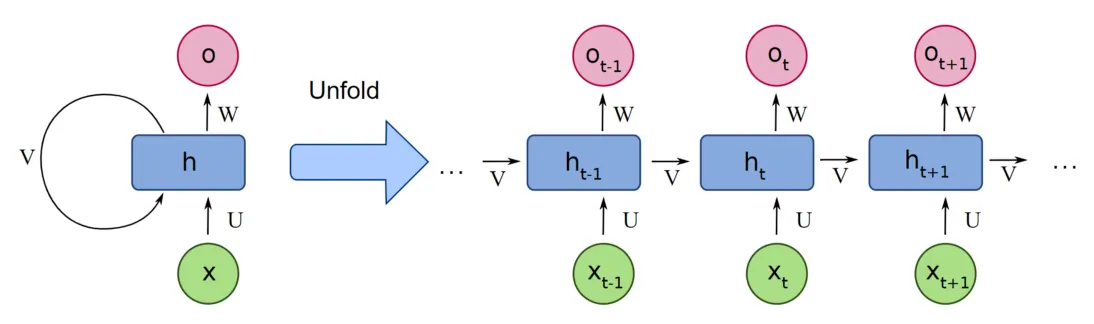

    Wxh = U = Weight matrix for input to hidden sate (x --> h)
    Why = W = Weight matrix for hidden state to output (h --> y)
    Whh = V = Weight matrix for hidden state (h --> h)

    ht = h = hidden state vector

    bh = bais vector for hidden state
    by = bais vector for output

    given, x_t  = input (feature) vector at time t
                = input-size = n x m
                = n features/time steps with each m vector size
    
    Wxh = U = (x --> h) input to hidden, weight matrix
            = m x h
            = h, hidden state size
    
    Whh = V = (h --> h) hidden state, Weight matrix
            = h x h
    
    ht  = h = hidden state vector
            = 1 x h

    Why = W = (h --> y) hidden state to output, Weight matrix
            = h x y
            = y, output size


    ht  = hidden state at time t
        = Non-Linear-Activation( Wxh.x_t + Whh.h_t-1 + bh )
        = tanh( Wxh.x_t + Whh.h_t-1 + bh )
    
    yt  = output at time t
        = Why.ht + by

In [ ]:
import numpy as np

def tanh(x):
    return np.tanh(x)

class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.Wxh = np.random.randn(input_size, hidden_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.bh = np.zeros((1, hidden_size))
        self.h = np.zeros((1, hidden_size))  # initial hidden state

        self.Why = np.random.randn(hidden_size, output_size) * 0.01
        self.by = np.zeros((1, output_size))

    def forward(self, inputs):  # inputs: (seq_len, input_size)
        for x in inputs:
            x = x.reshape(1, -1)
            self.h = tanh(np.dot(x, self.Wxh) + np.dot(self.h, self.Whh) + self.bh)
        output = np.dot(self.h, self.Why) + self.by
        return output

# Example usage
np.random.seed(42)
inputs = np.arange(5)  # 5 time steps, 1 feature each
print('input :', inputs)
rnn = SimpleRNN(input_size=1, hidden_size=4, output_size=1)
output = rnn.forward(inputs)
print("RNN Output:\n", output)

input : [0 1 2 3 4]
RNN Output:
 [[-0.00054298]]


In [ ]:
# Example usage
np.random.seed(42)
inputs = np.arange(5)  # 5 time steps, 1 feature each
print('input :', inputs)
rnn = SimpleRNN(input_size=1, hidden_size=4, output_size=3)
output = rnn.forward(inputs)
print("RNN Output:\n", output)

input : [0 1 2 3 4]
RNN Output:
 [[-0.00010047 -0.00027921  0.00096975]]


In [ ]:
import numpy as np

def tanh(x):
    return np.tanh(x)

class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.Wxh = np.random.randn(input_size, hidden_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.bh = np.zeros((1, hidden_size))
        self.h = np.zeros((1, hidden_size))  # initial hidden state

        self.Why = np.random.randn(hidden_size, output_size) * 0.01
        self.by = np.zeros((1, output_size))

    def forward(self, inputs):  # inputs: (seq_len, input_size)
        time_step = 0
        output = None
        for x in inputs:
            x = x.reshape(1, -1)
            self.h = tanh(np.dot(x, self.Wxh) + np.dot(self.h, self.Whh) + self.bh)
            print(f"\nhidden state (h) vector at time step ({time_step}) : {self.h}")
            output = np.dot(self.h, self.Why) + self.by
            print(f"output (y) vector at time step ({time_step}) : {output}\n")
            time_step += 1

        return output

# Example usage
np.random.seed(42)
inputs = np.arange(5)  # 5 time steps, 1 feature each
print('input :', inputs)
rnn = SimpleRNN(input_size=1, hidden_size=4, output_size=1)
output = rnn.forward(inputs)
print("RNN Output:\n", output)

input : [0 1 2 3 4]

hidden state (h) vector at time step (0) : [[0. 0. 0. 0.]]
output (y) vector at time step (0) : [[0.]]


hidden state (h) vector at time step (1) : [[ 0.0049671  -0.00138264  0.00647679  0.01522912]]
output (y) vector at time step (1) : [[-0.00013668]]


hidden state (h) vector at time step (2) : [[ 0.00979026 -0.00286047  0.01278792  0.03024443]]
output (y) vector at time step (2) : [[-0.00027232]]


hidden state (h) vector at time step (3) : [[ 0.01461551 -0.00433597  0.01910099  0.04524938]]
output (y) vector at time step (3) : [[-0.00040779]]


hidden state (h) vector at time step (4) : [[ 0.01944017 -0.00581151  0.02541262  0.06023409]]
output (y) vector at time step (4) : [[-0.00054298]]

RNN Output:
 [[-0.00054298]]


    let, our true ouput to be 1, 2, 3, 4, 5

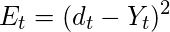

    calculate loss,
    Mean Square Error:
    at time-step: 4
    = ((5-(-0.005))^2)

In [ ]:
(5-(-0.005))**2

25.050024999999998

    minimize the loss,
    by using gradient descent

# Backpropagation through time (BPTT)

    so, loss  = Mean (gt - yt)^2
              = 1/t SUM (gt - yt)^2
    ==> loss at time t = loss_t = (gt - yt)^2

    derivative of loss:
    d(loss) = SUM d(loss_t)

    derivative of loss at time-step t:
    
    hmmm, ...
    ...
    wait...
    what are parameters, we actually trying to estimate...

    Wxh, Whh, Why, bh, by

chain rule:

    d(L)/d(ht)  = d(Lt)/d(ht) + d(Lt+1)/d(ht+1) * d(ht+1)/d(ht) + d(Lt+2)/d(ht+2) * d(ht+2)/d(ht+1) * d(ht+1)/d(ht) + ......+ d(LT)/d(hT) .. d(ht+1)/d(ht)

    derivative of loss at time-step t:
    w.r.t ht

    d(loss_t)/d(ht)  = d((yt-gt)^2)/d(by)
                      = 2*(yt-gt) d(yt)/d(ht)
                      = 2*(yt-gt) d(ht.Why + by)/d(ht)
                      = 2*(yt-gt) Why + d(Loss_t+1)/d(ht+1) * d(h+1)/d(ht) + d(Loss_t+2)/d(ht+2) * d(h+2)/d(ht+1) * d(h+1)/d(ht) + ...
                      = 2*(yt-gt) Why + dh_next

    derivative of loss at time-step t:
    w.r.t Why

    d(loss_t)/d(Why)  = d((yt-gt)^2)/d(Why)
                      = 2*(yt-gt) d(yt)/d(Why)
                      = 2*(yt-gt) d(ht.Why + by)/d(Why)
                      = 2*(yt-gt) ht

    derivative of loss at time-step t:
    w.r.t by

    d(loss_t)/d(by)  = d((yt-gt)^2)/d(by)
                      = 2*(yt-gt) d(yt)/d(by)
                      = 2*(yt-gt) d(ht.Why + by)/d(by)
                      = 2*(yt-gt)

    derivative of loss at time-step t:
    w.r.t Wxh

    d(loss_t)/d(Wxh)  = d((yt-gt)^2)/d(Wxh)
                      = 2*(yt-gt) d(yt)/d(Wxh)
                      = 2*(yt-gt) d(ht.Why + by)/d(Wxh)
                      = 2*(yt-gt) Why d(ht)/d(Wxh)
                      = d(loss_t)/d(ht) * d(tanh)/d(Wxh) * x

    derivative of loss at time-step t:
    w.r.t Whh

    d(loss_t)/d(Whh)  = d((yt-gt)^2)/d(Whh)
                      = 2*(yt-gt) d(yt)/d(Whh)
                      = 2*(yt-gt) d(ht.Why + by)/d(Whh)
                      = 2*(yt-gt) Why d(ht)/d(Whh)
                      = d(loss_t)/d(ht) * d(tanh)/d(Whh) * ht-1

    derivative of loss at time-step t:
    w.r.t bh

    d(loss_t)/d(bh)  = d((yt-gt)^2)/d(bh)
                      = 2*(yt-gt) d(yt)/d(bh)
                      = 2*(yt-gt) d(ht.Why + by)/d(bh)
                      = 2*(yt-gt) Why d(ht)/d(bh)
                      = d(loss_t)/d(ht) * d(tanh)/d(Wxh)

In [ ]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Hyperparameters
input_size = 1
hidden_size = 4
output_size = 1
seq_len = 5

# Initialize weights
W_xh = np.random.randn(hidden_size, input_size) * 0.01
W_hh = np.random.randn(hidden_size, hidden_size) * 0.01
W_hy = np.random.randn(output_size, hidden_size) * 0.01

b_h = np.zeros((hidden_size, 1))
b_y = np.zeros((output_size, 1))

# Dummy input sequence (shape: seq_len x input_size)
xs = [np.random.randn(input_size, 1) for _ in range(seq_len)]
targets = [np.random.randn(output_size, 1) for _ in range(seq_len)]

# Storage for forward pass
hs = [np.zeros((hidden_size, 1))]  # h_0 = 0
ys = []
loss = 0

# --- Forward pass ---
for t in range(seq_len):
    h_prev = hs[-1]
    h = np.tanh(np.dot(W_xh, xs[t]) + np.dot(W_hh, h_prev) + b_h)
    y = np.dot(W_hy, h) + b_y
    hs.append(h)
    ys.append(y)
    loss += np.sum((y - targets[t])**2)  # MSE

print("Loss:", loss)

# --- Backpropagation Through Time (BPTT) ---
# Initialize gradients
dW_xh = np.zeros_like(W_xh)
dW_hh = np.zeros_like(W_hh)
dW_hy = np.zeros_like(W_hy)
db_h = np.zeros_like(b_h)
db_y = np.zeros_like(b_y)

dh_next = np.zeros_like(hs[0])

for t in reversed(range(seq_len)):
    dy = 2 * (ys[t] - targets[t])  # dL/dy
    dW_hy += np.dot(dy, hs[t+1].T)
    db_y += dy

    dh = np.dot(W_hy.T, dy) + dh_next  # backprop into h
    dtanh = (1 - hs[t+1] ** 2) * dh    # tanh'(z) = 1 - tanh^2(z)

    dW_xh += np.dot(dtanh, xs[t].T)
    dW_hh += np.dot(dtanh, hs[t].T)
    db_h += dtanh

    dh_next = np.dot(W_hh.T, dtanh)

# Clip gradients (to prevent exploding gradients)
for dparam in [dW_xh, dW_hh, dW_hy, db_h, db_y]:
    np.clip(dparam, -5, 5, out=dparam)

print("\nGradient for W_xh:\n", dW_xh)
print("\nGradient for W_hh:\n", dW_hh)
print("\nGradient for W_hy:\n", dW_hy)

Loss: 4.996617519177488

Gradient for W_xh:
 [[ 0.0412753 ]
 [-0.00632976]
 [ 0.0017975 ]
 [-0.04023796]]

Gradient for W_hh:
 [[-2.35428752e-05  6.99324845e-06 -2.80195605e-05 -6.62090136e-05]
 [ 3.79209745e-06 -1.12262862e-06  4.53806775e-06  1.07185962e-05]
 [-1.80356952e-06  5.16430369e-07 -2.27123573e-06 -5.34496789e-06]
 [ 2.19917522e-05 -6.55679959e-06  2.60166972e-05  6.15036982e-05]]

Gradient for W_hy:
 [[ 0.01393951 -0.00385777  0.01830111  0.0430223 ]]


In [ ]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate

        self.Wxh = np.random.randn(input_size, hidden_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(hidden_size, output_size) * 0.01
        self.bh = np.zeros((1, hidden_size))
        self.by = np.zeros((1, output_size))

    def forward(self, inputs):
        self.inputs = inputs
        self.hs = {}  # hidden states
        self.hs[-1] = np.zeros((1, self.hidden_size))  # h0
        self.outputs = {}

        for t in range(len(inputs)):
            x = inputs[t].reshape(1, -1)
            self.hs[t] = tanh(np.dot(x, self.Wxh) + np.dot(self.hs[t-1], self.Whh) + self.bh)
            self.outputs[t] = np.dot(self.hs[t], self.Why) + self.by

        return self.outputs

    def backward(self, targets):
        dWxh = np.zeros_like(self.Wxh)
        dWhh = np.zeros_like(self.Whh)
        dWhy = np.zeros_like(self.Why)
        dbh = np.zeros_like(self.bh)
        dby = np.zeros_like(self.by)

        dh_next = np.zeros((1, self.hidden_size))

        loss = 0

        for t in reversed(range(len(self.inputs))):
            x = self.inputs[t].reshape(1, -1)
            y = self.outputs[t]
            target = targets[t].reshape(1, -1)

            dy = y - target
            loss += np.sum(dy ** 2)  # MSE loss

            dy = 2 * dy

            dWhy += np.dot(self.hs[t].T, dy)
            dby += dy

            dh = np.dot(dy, self.Why.T) + dh_next
            dh_raw = dh * tanh_derivative(self.hs[t])

            dWxh += np.dot(x.T, dh_raw)
            dWhh += np.dot(self.hs[t-1].T, dh_raw)
            dbh += dh_raw

            dh_next = np.dot(dh_raw, self.Whh.T)

        # Clip gradients to prevent exploding gradients
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -1, 1, out=dparam)

        # Update parameters
        self.Wxh -= self.lr * dWxh
        self.Whh -= self.lr * dWhh
        self.Why -= self.lr * dWhy
        self.bh  -= self.lr * dbh
        self.by  -= self.lr * dby

        return loss / len(self.inputs)

    def train(self, inputs, targets, epochs=100):
        for epoch in range(epochs):
            self.forward(inputs)
            loss = self.backward(targets)
            if epoch%9 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [ ]:
np.random.seed(42)
inputs = np.arange(5).reshape(-1, 1)
targets = np.arange(1, 6).reshape(-1, 1)  # next number

print(inputs)
print(targets)

[[0]
 [1]
 [2]
 [3]
 [4]]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
rnn = SimpleRNN(input_size=1, hidden_size=2, output_size=1, learning_rate=0.1)
rnn.train(inputs, targets, epochs=100)

Epoch 0, Loss: 10.9989
Epoch 1, Loss: 10.3115
Epoch 2, Loss: 9.2653
Epoch 3, Loss: 7.7473
Epoch 4, Loss: 6.1754
Epoch 5, Loss: 4.8466
Epoch 6, Loss: 3.7838
Epoch 7, Loss: 2.9528
Epoch 8, Loss: 2.3302
Epoch 9, Loss: 1.9052
Epoch 10, Loss: 1.6740
Epoch 11, Loss: 1.6355
Epoch 12, Loss: 1.6849
Epoch 13, Loss: 1.7294
Epoch 14, Loss: 1.7756
Epoch 15, Loss: 1.8210
Epoch 16, Loss: 1.8687
Epoch 17, Loss: 1.8758
Epoch 18, Loss: 1.9219
Epoch 19, Loss: 1.9175
Epoch 20, Loss: 1.9591
Epoch 21, Loss: 1.9469
Epoch 22, Loss: 1.9850
Epoch 23, Loss: 1.9672
Epoch 24, Loss: 2.0028
Epoch 25, Loss: 1.9811
Epoch 26, Loss: 2.0149
Epoch 27, Loss: 1.9905
Epoch 28, Loss: 2.0231
Epoch 29, Loss: 1.9969
Epoch 30, Loss: 2.0286
Epoch 31, Loss: 2.0012
Epoch 32, Loss: 2.0324
Epoch 33, Loss: 2.0041
Epoch 34, Loss: 2.0349
Epoch 35, Loss: 2.0060
Epoch 36, Loss: 2.0366
Epoch 37, Loss: 2.0073
Epoch 38, Loss: 2.0377
Epoch 39, Loss: 2.0082
Epoch 40, Loss: 2.0385
Epoch 41, Loss: 2.0088
Epoch 42, Loss: 2.0390
Epoch 43, Loss: 2.0

In [ ]:
outputs = rnn.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

Input: 0, Predicted: 3.200, Target: 1
Input: 1, Predicted: 3.200, Target: 2
Input: 2, Predicted: 3.200, Target: 3
Input: 3, Predicted: 3.200, Target: 4
Input: 4, Predicted: 3.200, Target: 5


    What's wrong in implementation?

    Why loss is decreasing after some epochs.....

    this situation is.....
    Vanishing Gradients (common in vanilla RNNs)

    1. Normalize Inputs
    You're using MSE loss on unbounded outputs.
    
    The model isn't encouraged to spread predictions —
    hence convergence to a constant mean-like value

In [ ]:
inputs = (np.arange(0, 5).reshape(-1, 1) - 2) / 5
targets = (np.arange(6, 11).reshape(-1, 1) - 3) / 5

print(inputs,'\n', targets)

rnn = SimpleRNN(input_size=1, hidden_size=2, output_size=1, learning_rate=0.1)
rnn.train(inputs, targets, epochs=100)

outputs = rnn.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

[[-0.4]
 [-0.2]
 [ 0. ]
 [ 0.2]
 [ 0.4]] 
 [[0.6]
 [0.8]
 [1. ]
 [1.2]
 [1.4]]
Epoch 0, Loss: 1.0800
Epoch 9, Loss: 0.0869
Epoch 18, Loss: 0.0766
Epoch 27, Loss: 0.0668
Epoch 36, Loss: 0.0401
Epoch 45, Loss: 0.0094
Epoch 54, Loss: 0.0014
Epoch 63, Loss: 0.0007
Epoch 72, Loss: 0.0005
Epoch 81, Loss: 0.0004
Epoch 90, Loss: 0.0003
Epoch 99, Loss: 0.0003
Input: -0.4, Predicted: 0.626, Target: 0.6
Input: -0.2, Predicted: 0.777, Target: 0.8
Input: 0.0, Predicted: 0.991, Target: 1.0
Input: 0.2, Predicted: 1.207, Target: 1.2
Input: 0.4, Predicted: 1.401, Target: 1.4


    practice with different inputs

In [ ]:
normalize = 4     # 1, 2, 3, -1, -2
inputs = (np.arange(0, 5).reshape(-1, 1) - 2) / 5
targets = np.arange(1.0, 6.0).reshape(-1, 1) - normalize

print(inputs,'\n', targets)

rnn = SimpleRNN(input_size=1, hidden_size=2, output_size=1, learning_rate=0.1)
rnn.train(inputs, targets, epochs=100)

outputs = rnn.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

[[-0.4]
 [-0.2]
 [ 0. ]
 [ 0.2]
 [ 0.4]] 
 [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]]
Epoch 0, Loss: 3.0000
Epoch 9, Loss: 1.9830
Epoch 18, Loss: 0.8026
Epoch 27, Loss: 0.0622
Epoch 36, Loss: 0.0986
Epoch 45, Loss: 0.0257
Epoch 54, Loss: 0.0700
Epoch 63, Loss: 0.0289
Epoch 72, Loss: 0.0517
Epoch 81, Loss: 0.0328
Epoch 90, Loss: 0.0424
Epoch 99, Loss: 0.0357
Input: -0.4, Predicted: -2.875, Target: -3.0
Input: -0.2, Predicted: -1.771, Target: -2.0
Input: 0.0, Predicted: -0.780, Target: -1.0
Input: 0.2, Predicted: 0.289, Target: 0.0
Input: 0.4, Predicted: 0.963, Target: 1.0


In [ ]:
inputs = np.arange(1, 6).reshape(-1, 1)
targets = np.arange(2, 7).reshape(-1, 1)

print(inputs,'\n', targets)

rnn = SimpleRNN(input_size=1, hidden_size=2, output_size=1, learning_rate=0.1)
rnn.train(inputs, targets, epochs=100)

outputs = rnn.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

[[1]
 [2]
 [3]
 [4]
 [5]] 
 [[2]
 [3]
 [4]
 [5]
 [6]]
Epoch 0, Loss: 17.9998
Epoch 9, Loss: 6.2649
Epoch 18, Loss: 2.0178
Epoch 27, Loss: 2.0095
Epoch 36, Loss: 2.0399
Epoch 45, Loss: 2.0100
Epoch 54, Loss: 2.0399
Epoch 63, Loss: 2.0100
Epoch 72, Loss: 2.0399
Epoch 81, Loss: 2.0100
Epoch 90, Loss: 2.0399
Epoch 99, Loss: 2.0100
Input: 1, Predicted: 4.200, Target: 2
Input: 2, Predicted: 4.200, Target: 3
Input: 3, Predicted: 4.200, Target: 4
Input: 4, Predicted: 4.200, Target: 5
Input: 5, Predicted: 4.200, Target: 6


In [ ]:
inputs = np.arange(1.0, 6.0).reshape(-1, 1)
targets = np.arange(1.0, 6.0).reshape(-1, 1)

print(inputs,'\n', targets)

rnn = SimpleRNN(input_size=1, hidden_size=2, output_size=1, learning_rate=0.1)
rnn.train(inputs, targets, epochs=100)

outputs = rnn.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]] 
 [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Epoch 0, Loss: 10.9995
Epoch 9, Loss: 2.3341
Epoch 18, Loss: 2.0337
Epoch 27, Loss: 2.0098
Epoch 36, Loss: 2.0400
Epoch 45, Loss: 2.0100
Epoch 54, Loss: 2.0400
Epoch 63, Loss: 2.0100
Epoch 72, Loss: 2.0400
Epoch 81, Loss: 2.0100
Epoch 90, Loss: 2.0400
Epoch 99, Loss: 2.0100
Input: 1.0, Predicted: 3.200, Target: 1.0
Input: 2.0, Predicted: 3.200, Target: 2.0
Input: 3.0, Predicted: 3.200, Target: 3.0
Input: 4.0, Predicted: 3.200, Target: 4.0
Input: 5.0, Predicted: 3.200, Target: 5.0


In [ ]:
inputs = np.random.uniform(-3, 6, size=(10, 1))
targets = np.random.uniform(-3, 6, size=(10, 1))

print(inputs,'\n', targets)

rnn = SimpleRNN(input_size=1, hidden_size=5, output_size=1, learning_rate=0.1)
rnn.train(inputs, targets, epochs=100)

outputs = rnn.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

[[ 4.81621178]
 [ 1.38688078]
 [ 5.05097004]
 [ 4.1986973 ]
 [ 0.82692154]
 [-2.79777623]
 [-0.58190377]
 [ 1.87470793]
 [ 2.70130398]
 [-0.67901083]] 
 [[-1.74579533]
 [ 4.51437213]
 [ 5.85961963]
 [ 1.73121164]
 [-1.45488643]
 [-0.54923406]
 [-2.83448391]
 [ 5.22868926]
 [-1.94024025]
 [ 2.18864828]]
Epoch 0, Loss: 10.7089
Epoch 9, Loss: 7.9441
Epoch 18, Loss: 7.0058
Epoch 27, Loss: 4.2207
Epoch 36, Loss: 2.6277
Epoch 45, Loss: 2.2482
Epoch 54, Loss: 5.5827
Epoch 63, Loss: 10.2494
Epoch 72, Loss: 4.9871
Epoch 81, Loss: 2.9031
Epoch 90, Loss: 4.5883
Epoch 99, Loss: 3.7424
Input: 4.816211783081215, Predicted: -1.291, Target: -1.7457953333445828
Input: 1.3868807842456228, Predicted: 2.910, Target: 4.514372131193692
Input: 5.050970042046822, Predicted: 2.911, Target: 5.85961962633197
Input: 4.198697303525837, Predicted: 2.911, Target: 1.7312116407241724
Input: 0.8269215402231009, Predicted: 1.977, Target: -1.4548864273652686
Input: -2.7977762251189433, Predicted: -2.830, Target: -0.54923

# LSTM (Long Short-Term Memory)

if still can-not solve Vanishing Gradient problem, try LSTM (Long Short-Term Memory)

    - learn long-term dependencies
    - memory cell and gates
    - what to remember, what to forget, and what to output

LSTM architectures

    - involves the memory cell
    - which is controlled by three gates:
      1. the input gate:     - Learn what information to add
      2. the forget gate:    - Learn what information to forget
      3. the output gate:    - Learn what information to output

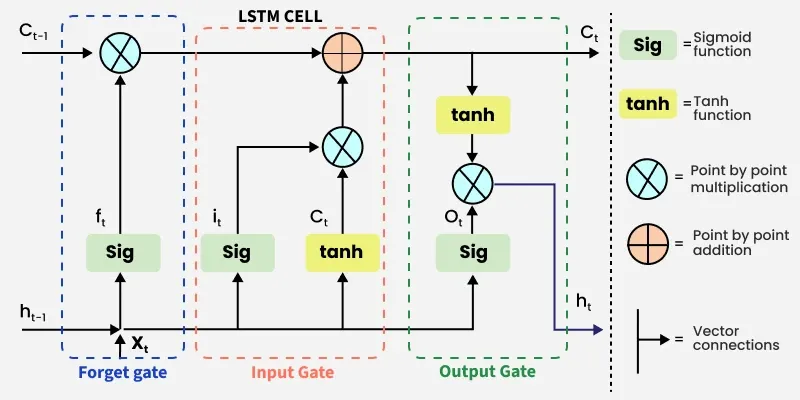

## Forget Gate

          ft = σ( Wf⋅ [ht−1,xt] + bf )

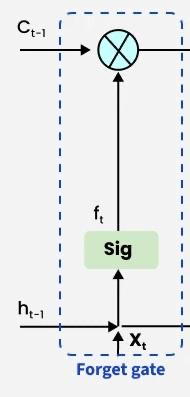

    Wf         = weight matrix of forgot gate
    [ht-1, xt] = concatenation of ht-1, xt (current input and previous hidden state)
    bf         = bais of forgot gate
    σ          = sigmoid activation function.


## Input gate

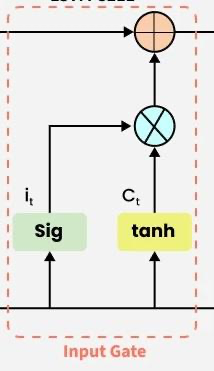

          it = σ( Wi⋅[ht−1, xt] + bi )

          Ct* = tanh( Wc⋅[ht−1, xt] + bc )

          Ct = ft ⊙ Ct-1 + it ⊙ Ct*

    it         = information/ input gate at time t

    Wi         = Weight matrix of information / input gate
    bi         = bais for information
    [ht-1, xt] = concatenation of ht-1, xt (current input and previous hidden state)

    Ct*        = Candidate Memory
    Ct         = Memory Cell state
    Wc         = weight matrix for memory cell state
    bc         = bais for memory cell state

    Update:
    Ct = ft ⊙ Ct-1 + it ⊙ Ct*

    ⊙         = Element-wise Multiplication

## Output gate

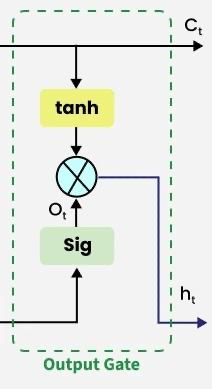

          ot = σ( Wo⋅[ht−1, xt] + bo)
          ht = ot ⊙ tanh(Ct)

    ht = final hidden state for time-step t
    ot = output gate state

    Wo = weight matrix of output gate
    bo = bais vector of output gate


##  Implementating LSTM

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class SimpleLSTM:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size

        # Weight matrices for gates
        self.Wf = np.random.randn(input_size + hidden_size, hidden_size) * 0.01
        self.Wi = np.random.randn(input_size + hidden_size, hidden_size) * 0.01
        self.Wc = np.random.randn(input_size + hidden_size, hidden_size) * 0.01
        self.Wo = np.random.randn(input_size + hidden_size, hidden_size) * 0.01

        self.bf = np.zeros((1, hidden_size))
        self.bi = np.zeros((1, hidden_size))
        self.bc = np.zeros((1, hidden_size))
        self.bo = np.zeros((1, hidden_size))

        self.h = np.zeros((1, hidden_size))  # hidden state
        self.c = np.zeros((1, hidden_size))  # cell state

        self.Why = np.random.randn(hidden_size, output_size) * 0.01
        self.by = np.zeros((1, output_size))

    def forward(self, inputs):  # inputs: (seq_len, input_size)
        for x in inputs:
            x = x.reshape(1, -1)
            combined = np.concatenate((x, self.h), axis=1)

            f = sigmoid(np.dot(combined, self.Wf) + self.bf)
            i = sigmoid(np.dot(combined, self.Wi) + self.bi)
            c_hat = tanh(np.dot(combined, self.Wc) + self.bc)
            self.c = f * self.c + i * c_hat
            o = sigmoid(np.dot(combined, self.Wo) + self.bo)
            self.h = o * tanh(self.c)

        output = np.dot(self.h, self.Why) + self.by
        return output

# Example usage
np.random.seed(42)
inputs = np.arange(5).reshape(-1, 1)  # 5 time steps, 1 feature each
print("Input:", inputs.flatten())

lstm = SimpleLSTM(input_size=1, hidden_size=4, output_size=1)
output = lstm.forward(inputs)
print("LSTM Output:\n", output)

Input: [0 1 2 3 4]
LSTM Output:
 [[-1.91401284e-05]]


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

class SimpleLSTM:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate

        # Weights: combined input and hidden for all gates
        self.Wf = np.random.randn(input_size + hidden_size, hidden_size) * 0.01
        self.Wi = np.random.randn(input_size + hidden_size, hidden_size) * 0.01
        self.Wc = np.random.randn(input_size + hidden_size, hidden_size) * 0.01
        self.Wo = np.random.randn(input_size + hidden_size, hidden_size) * 0.01

        self.bf = np.zeros((1, hidden_size))
        self.bi = np.zeros((1, hidden_size))
        self.bc = np.zeros((1, hidden_size))
        self.bo = np.zeros((1, hidden_size))

        self.Why = np.random.randn(hidden_size, output_size) * 0.01
        self.by = np.zeros((1, output_size))

    def forward(self, inputs):
        self.inputs = inputs
        self.h = { -1: np.zeros((1, self.hidden_size)) }
        self.c = { -1: np.zeros((1, self.hidden_size)) }
        self.f, self.i, self.o, self.c_hat = {}, {}, {}, {}
        self.c_t, self.h_t = {}, {}
        self.concat = {}
        self.outputs = {}

        for t in range(len(inputs)):
            x = inputs[t].reshape(1, -1)
            concat = np.concatenate((x, self.h[t - 1]), axis=1)
            self.concat[t] = concat

            self.f[t] = sigmoid(np.dot(concat, self.Wf) + self.bf)
            self.i[t] = sigmoid(np.dot(concat, self.Wi) + self.bi)
            self.c_hat[t] = tanh(np.dot(concat, self.Wc) + self.bc)
            self.c[t] = self.f[t] * self.c[t - 1] + self.i[t] * self.c_hat[t]
            self.o[t] = sigmoid(np.dot(concat, self.Wo) + self.bo)
            self.h[t] = self.o[t] * tanh(self.c[t])
            self.outputs[t] = np.dot(self.h[t], self.Why) + self.by

        return self.outputs

    def backward(self, targets):
        dWf = np.zeros_like(self.Wf)
        dWi = np.zeros_like(self.Wi)
        dWc = np.zeros_like(self.Wc)
        dWo = np.zeros_like(self.Wo)
        dbf = np.zeros_like(self.bf)
        dbi = np.zeros_like(self.bi)
        dbc = np.zeros_like(self.bc)
        dbo = np.zeros_like(self.bo)
        dWhy = np.zeros_like(self.Why)
        dby = np.zeros_like(self.by)

        dh_next = np.zeros((1, self.hidden_size))
        dc_next = np.zeros((1, self.hidden_size))
        loss = 0

        for t in reversed(range(len(self.inputs))):
            x = self.inputs[t].reshape(1, -1)
            target = targets[t].reshape(1, -1)
            y = self.outputs[t]

            dy = (y - target)
            loss += np.sum((y - target) ** 2)

            dy = 2*dy

            dWhy += np.dot(self.h[t].T, dy)
            dby += dy

            dh = np.dot(dy, self.Why.T) + dh_next
            do = dh * tanh(self.c[t]) * sigmoid_derivative(np.dot(self.concat[t], self.Wo) + self.bo)
            dc = dh * self.o[t] * tanh_derivative(self.c[t]) + dc_next
            df = dc * self.c[t - 1] * sigmoid_derivative(np.dot(self.concat[t], self.Wf) + self.bf)
            di = dc * self.c_hat[t] * sigmoid_derivative(np.dot(self.concat[t], self.Wi) + self.bi)
            dc_hat = dc * self.i[t] * tanh_derivative(np.dot(self.concat[t], self.Wc) + self.bc)

            dWf += np.dot(self.concat[t].T, df)
            dWi += np.dot(self.concat[t].T, di)
            dWc += np.dot(self.concat[t].T, dc_hat)
            dWo += np.dot(self.concat[t].T, do)
            dbf += df
            dbi += di
            dbc += dc_hat
            dbo += do

            dconcat = (
                np.dot(df, self.Wf.T)
                + np.dot(di, self.Wi.T)
                + np.dot(dc_hat, self.Wc.T)
                + np.dot(do, self.Wo.T)
            )

            dh_next = dconcat[:, self.input_size:]
            dc_next = dc * self.f[t]

        # Clip gradients
        for dparam in [dWf, dWi, dWc, dWo, dbf, dbi, dbc, dbo, dWhy, dby]:
            np.clip(dparam, -1, 1, out=dparam)

        # Update weights
        self.Wf -= self.lr * dWf
        self.Wi -= self.lr * dWi
        self.Wc -= self.lr * dWc
        self.Wo -= self.lr * dWo
        self.bf -= self.lr * dbf
        self.bi -= self.lr * dbi
        self.bc -= self.lr * dbc
        self.bo -= self.lr * dbo
        self.Why -= self.lr * dWhy
        self.by -= self.lr * dby

        return loss / len(self.inputs)

    def train(self, inputs, targets, epochs=100):
        for epoch in range(epochs):
            self.forward(inputs)
            loss = self.backward(targets)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

np.random.seed(42)
inputs = np.arange(5.0).reshape(-1, 1)
targets = np.arange(1.0, 6.0).reshape(-1, 1)

print(inputs,'\n', targets)

lstm = SimpleLSTM(input_size=1, hidden_size=4, output_size=1)
lstm.train(inputs, targets, epochs=200)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]] 
 [[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Epoch 0, Loss: 11.0001
Epoch 10, Loss: 10.3415
Epoch 20, Loss: 9.1903
Epoch 30, Loss: 7.3881
Epoch 40, Loss: 5.2657
Epoch 50, Loss: 3.3237
Epoch 60, Loss: 1.8773
Epoch 70, Loss: 0.9320
Epoch 80, Loss: 0.4280
Epoch 90, Loss: 0.2466
Epoch 100, Loss: 0.1899
Epoch 110, Loss: 0.1467
Epoch 120, Loss: 0.1135
Epoch 130, Loss: 0.0888
Epoch 140, Loss: 0.0707
Epoch 150, Loss: 0.0576
Epoch 160, Loss: 0.0479
Epoch 170, Loss: 0.0407
Epoch 180, Loss: 0.0351
Epoch 190, Loss: 0.0307


In [ ]:
outputs = lstm.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

Input: 0.0, Predicted: 0.988, Target: 1.0
Input: 1.0, Predicted: 1.862, Target: 2.0
Input: 2.0, Predicted: 3.131, Target: 3.0
Input: 3.0, Predicted: 4.194, Target: 4.0
Input: 4.0, Predicted: 4.752, Target: 5.0


# Bi-directional LSTM

In [ ]:
class BiLSTM:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.forward_lstm = SimpleLSTM(input_size, hidden_size, output_size, learning_rate)
        self.backward_lstm = SimpleLSTM(input_size, hidden_size, output_size, learning_rate)
        self.output_size = output_size
        self.hidden_size = hidden_size

        # Final output layer weights (2 * hidden -> output)
        self.Why = np.random.randn(2 * hidden_size, output_size) * 0.01
        self.by = np.zeros((1, output_size))
        self.lr = learning_rate

    def forward(self, inputs):
        self.inputs = inputs
        self.fwd_outputs = self.forward_lstm.forward(inputs)
        self.bwd_outputs = self.backward_lstm.forward(inputs[::-1])  # reversed input
        self.outputs = {}

        for t in range(len(inputs)):
            h_fwd = self.forward_lstm.h[t]
            h_bwd = self.backward_lstm.h[len(inputs) - 1 - t]
            h_combined = np.concatenate((h_fwd, h_bwd), axis=1)
            self.outputs[t] = np.dot(h_combined, self.Why) + self.by

        return self.outputs

    def backward(self, targets):
        # Forward and backward LSTM backprop
        fwd_loss = self.forward_lstm.backward(targets)
        bwd_loss = self.backward_lstm.backward(targets[::-1])  # reversed target

        dWhy = np.zeros_like(self.Why)
        dby = np.zeros_like(self.by)

        for t in range(len(self.inputs)):
            target = targets[t].reshape(1, -1)
            y = self.outputs[t]
            dy = 2 * (y - target)

            h_fwd = self.forward_lstm.h[t]
            h_bwd = self.backward_lstm.h[len(self.inputs) - 1 - t]
            h_combined = np.concatenate((h_fwd, h_bwd), axis=1)

            dWhy += np.dot(h_combined.T, dy)
            dby += dy

        np.clip(dWhy, -1, 1, out=dWhy)
        np.clip(dby, -1, 1, out=dby)

        self.Why -= self.lr * dWhy
        self.by -= self.lr * dby

        return (fwd_loss + bwd_loss) / 2

    def train(self, inputs, targets, epochs=100):
        for epoch in range(epochs):
            self.forward(inputs)
            loss = self.backward(targets)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

np.random.seed(42)
inputs = np.arange(5.0).reshape(-1, 1)
targets = np.arange(1.0, 6.0).reshape(-1, 1)

bi_lstm = BiLSTM(input_size=1, hidden_size=4, output_size=1)
bi_lstm.train(inputs, targets, epochs=200)

Epoch 0, Loss: 11.0002
Epoch 10, Loss: 10.3015
Epoch 20, Loss: 9.1029
Epoch 30, Loss: 7.3111
Epoch 40, Loss: 5.2906
Epoch 50, Loss: 3.5031
Epoch 60, Loss: 2.2072
Epoch 70, Loss: 1.3840
Epoch 80, Loss: 0.9151
Epoch 90, Loss: 0.6270
Epoch 100, Loss: 0.3959
Epoch 110, Loss: 0.2344
Epoch 120, Loss: 0.1395
Epoch 130, Loss: 0.0886
Epoch 140, Loss: 0.0606
Epoch 150, Loss: 0.0442
Epoch 160, Loss: 0.0340
Epoch 170, Loss: 0.0275
Epoch 180, Loss: 0.0229
Epoch 190, Loss: 0.0196


In [ ]:
outputs = bi_lstm.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

Input: 0.0, Predicted: 0.910, Target: 1.0
Input: 1.0, Predicted: 1.794, Target: 2.0
Input: 2.0, Predicted: 3.069, Target: 3.0
Input: 3.0, Predicted: 4.187, Target: 4.0
Input: 4.0, Predicted: 4.866, Target: 5.0


In [ ]:
loss = bi_lstm.backward(targets)
print(loss)

0.01703555588096142


# GRU (Gated Recurrent Unit)

 — a simpler and faster alternative to LSTM, while still handling the vanishing gradient problem better than vanilla RNNs.

A GRU has two main gates:

1. Update gate (z):      Decides how much of the previous hidden state to keep.
2. Reset gate (r):       Controls how much of the previous hidden state to forget.

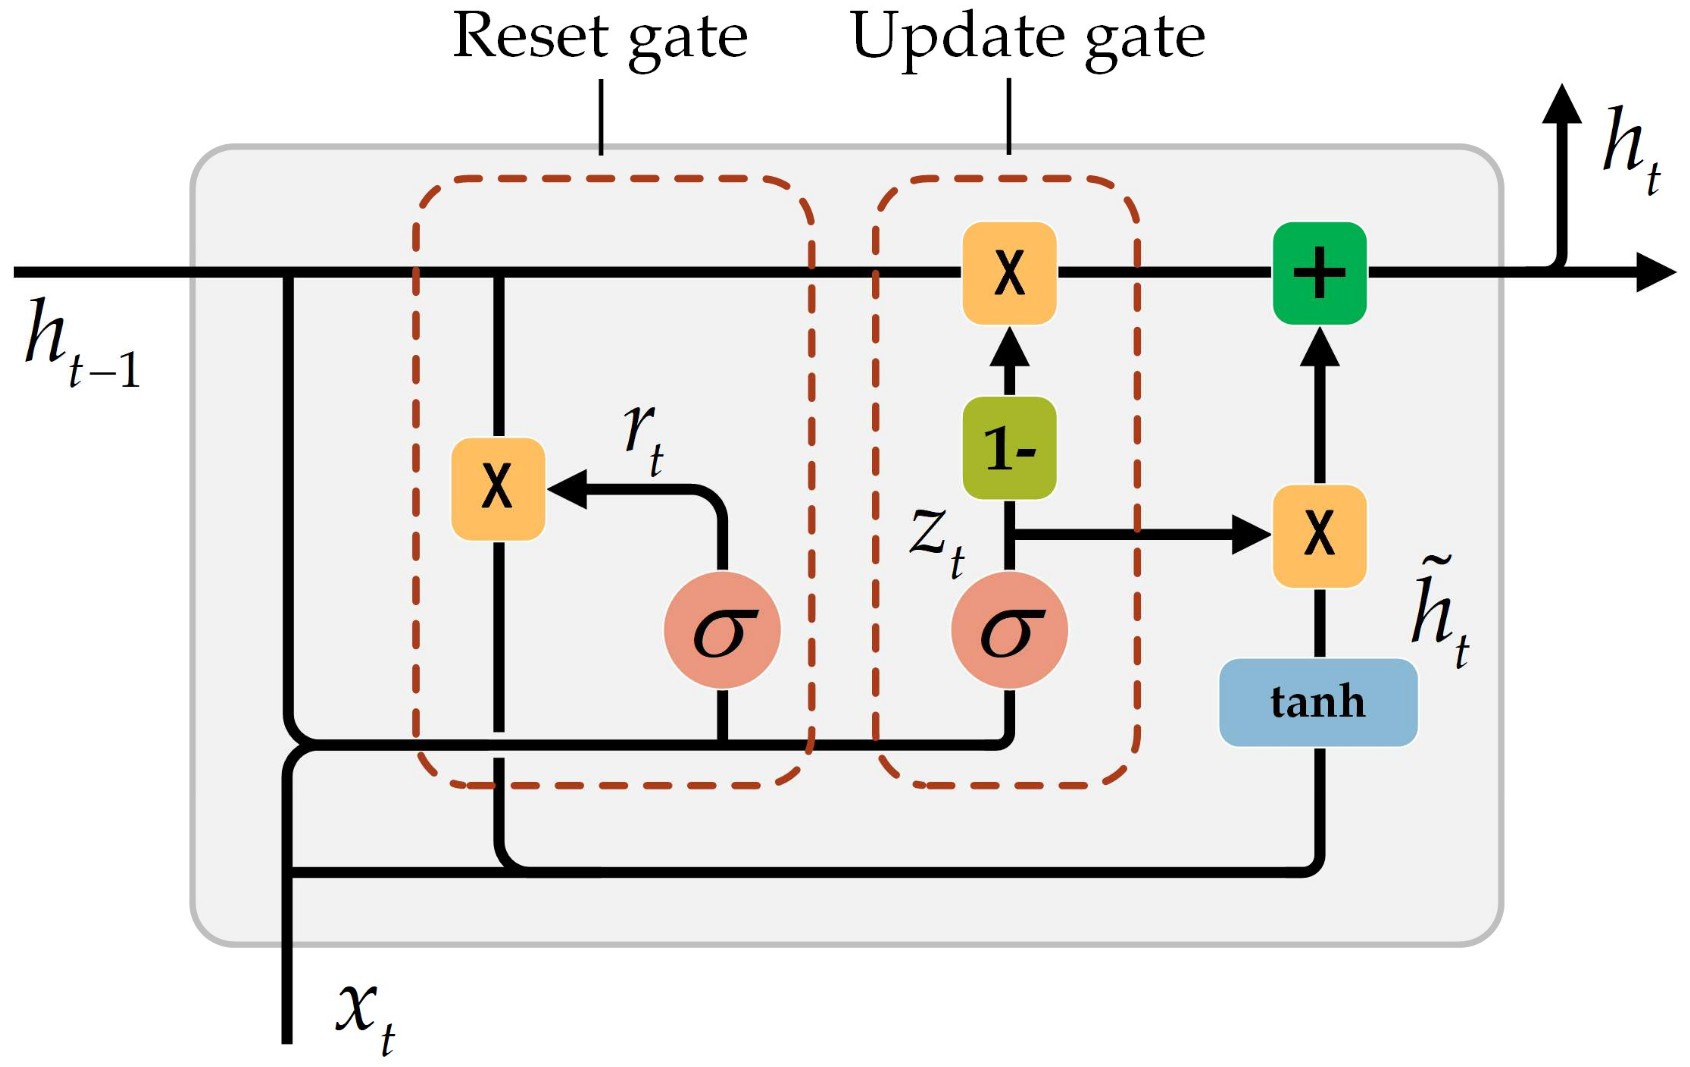

## Update gate

    zt = σ( Wz⋅[ht−1, xt] + bz)

              or

    zt = σ( Wzh⋅ht−1 + Wzx⋅xt + bz)

    zt = update gate at time-step t
    Wz = weight matrix of update gate
    Wzh = weight matrix for hidden state of update gate
    Wzx = weight matrix for input state of update gate
    bz  = bais vector of update gate

## Reset gate

same formula:

    rt = σ( Wr⋅[ht−1, xt] + br)

              or

    rt = σ( Wrh⋅ht−1 + Wrx⋅xt + br)

## Candidate Activation & Hidden State

Candidate Activation:

    ht* = tanh( Wh.[xt,rt*ht-1] + bh )

    or

    ht* = tanh( Whx.xt + Whh.(rt*ht-1) + bh )

Hidden State:

    ht = (1-zt) * ht-1 + zt * ht

## GRU Implementation

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class SimpleGRU:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate

        # Weight matrices
        self.Wz = np.random.randn(input_size, hidden_size) * 0.01
        self.Uz = np.random.randn(hidden_size, hidden_size) * 0.01
        self.bz = np.zeros((1, hidden_size))

        self.Wr = np.random.randn(input_size, hidden_size) * 0.01
        self.Ur = np.random.randn(hidden_size, hidden_size) * 0.01
        self.br = np.zeros((1, hidden_size))

        self.Wh = np.random.randn(input_size, hidden_size) * 0.01
        self.Uh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.bh = np.zeros((1, hidden_size))

        self.Why = np.random.randn(hidden_size, output_size) * 0.01
        self.by = np.zeros((1, output_size))

    def forward(self, inputs):
        self.inputs = inputs
        self.hs = {}
        self.zs, self.rs, self.h_tilde = {}, {}, {}
        self.hs[-1] = np.zeros((1, self.hidden_size))
        self.outputs = {}

        for t in range(len(inputs)):
            x = inputs[t].reshape(1, -1)
            h_prev = self.hs[t - 1]

            self.zs[t] = sigmoid(np.dot(x, self.Wz) + np.dot(h_prev, self.Uz) + self.bz)
            self.rs[t] = sigmoid(np.dot(x, self.Wr) + np.dot(h_prev, self.Ur) + self.br)
            h_reset = self.rs[t] * h_prev
            self.h_tilde[t] = tanh(np.dot(x, self.Wh) + np.dot(h_reset, self.Uh) + self.bh)
            self.hs[t] = (1 - self.zs[t]) * h_prev + self.zs[t] * self.h_tilde[t]

            self.outputs[t] = np.dot(self.hs[t], self.Why) + self.by

        return self.outputs

    def backward(self, targets):
        dWz = np.zeros_like(self.Wz)
        dUz = np.zeros_like(self.Uz)
        dbz = np.zeros_like(self.bz)

        dWr = np.zeros_like(self.Wr)
        dUr = np.zeros_like(self.Ur)
        dbr = np.zeros_like(self.br)

        dWh = np.zeros_like(self.Wh)
        dUh = np.zeros_like(self.Uh)
        dbh = np.zeros_like(self.bh)

        dWhy = np.zeros_like(self.Why)
        dby = np.zeros_like(self.by)

        dh_next = np.zeros((1, self.hidden_size))
        loss = 0

        for t in reversed(range(len(self.inputs))):
            x = self.inputs[t].reshape(1, -1)
            h = self.hs[t]
            h_prev = self.hs[t - 1]
            target = targets[t].reshape(1, -1)

            dy = 2 * (self.outputs[t] - target)
            loss += np.sum((self.outputs[t] - target) ** 2)

            dWhy += np.dot(h.T, dy)
            dby += dy

            dh = np.dot(dy, self.Why.T) + dh_next

            dz = (self.h_tilde[t] - h_prev) * dh
            dh_tilde = self.zs[t] * dh
            dh_prev = (1 - self.zs[t]) * dh

            dht_raw = dh_tilde * (1 - self.h_tilde[t] ** 2)

            dr = np.dot(dht_raw, self.Uh.T) * h_prev
            dh_prev += np.dot(dht_raw, self.Uh.T) * self.rs[t]

            dr_raw = dr * self.rs[t] * (1 - self.rs[t])
            dz_raw = dz * self.zs[t] * (1 - self.zs[t])

            dWz += np.dot(x.T, dz_raw)
            dUz += np.dot(h_prev.T, dz_raw)
            dbz += dz_raw

            dWr += np.dot(x.T, dr_raw)
            dUr += np.dot(h_prev.T, dr_raw)
            dbr += dr_raw

            dWh += np.dot(x.T, dht_raw)
            dUh += np.dot((self.rs[t] * h_prev).T, dht_raw)
            dbh += dht_raw

            dh_next = dh_prev

        # Gradient clipping
        for dparam in [dWz, dUz, dbz, dWr, dUr, dbr, dWh, dUh, dbh, dWhy, dby]:
            np.clip(dparam, -1, 1, out=dparam)

        # Update
        self.Wz -= self.lr * dWz
        self.Uz -= self.lr * dUz
        self.bz -= self.lr * dbz

        self.Wr -= self.lr * dWr
        self.Ur -= self.lr * dUr
        self.br -= self.lr * dbr

        self.Wh -= self.lr * dWh
        self.Uh -= self.lr * dUh
        self.bh -= self.lr * dbh

        self.Why -= self.lr * dWhy
        self.by -= self.lr * dby

        return loss / len(self.inputs)

    def train(self, inputs, targets, epochs=100):
        for epoch in range(epochs):
            self.forward(inputs)
            loss = self.backward(targets)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [ ]:
np.random.seed(42)
inputs = np.arange(5.0).reshape(-1, 1)
targets = np.arange(1.0, 6.0).reshape(-1, 1)

gru = SimpleGRU(input_size=1, hidden_size=4, output_size=1)
gru.train(inputs, targets, epochs=200)

Epoch 0, Loss: 10.9999
Epoch 10, Loss: 10.0764
Epoch 20, Loss: 8.2467
Epoch 30, Loss: 5.9369
Epoch 40, Loss: 3.8291
Epoch 50, Loss: 2.2644
Epoch 60, Loss: 1.2661
Epoch 70, Loss: 0.6977
Epoch 80, Loss: 0.4356
Epoch 90, Loss: 0.3011
Epoch 100, Loss: 0.1975
Epoch 110, Loss: 0.1264
Epoch 120, Loss: 0.0837
Epoch 130, Loss: 0.0595
Epoch 140, Loss: 0.0452
Epoch 150, Loss: 0.0361
Epoch 160, Loss: 0.0298
Epoch 170, Loss: 0.0252
Epoch 180, Loss: 0.0218
Epoch 190, Loss: 0.0192


In [ ]:
outputs = bi_lstm.forward(inputs)
for t in range(len(inputs)):
    print(f"Input: {inputs[t][0]}, Predicted: {outputs[t][0][0]:.3f}, Target: {targets[t][0]}")

Input: 0.0, Predicted: 0.911, Target: 1.0
Input: 1.0, Predicted: 1.790, Target: 2.0
Input: 2.0, Predicted: 3.063, Target: 3.0
Input: 3.0, Predicted: 4.183, Target: 4.0
Input: 4.0, Predicted: 4.867, Target: 5.0


# practice

In [4]:
import torch
import torch.nn as nn

# pointwise-convolution
# 1x1 conv to mix channels: 3 input channels to 16 output channels
pointwise = nn.Conv2d(3, 1, kernel_size=1)
input = torch.randn(1, 3, 5, 5)
output = pointwise(input)  # Shape: (1, 16, 32, 32)
output.shape

torch.Size([1, 1, 5, 5])

In [5]:
input

tensor([[[[ 0.2166, -0.9759,  1.1078, -0.6201, -0.4297],
          [ 0.0027, -0.9750, -0.3487, -1.6054,  0.3157],
          [-0.3730,  0.1262, -1.4360, -0.5759,  1.2401],
          [ 1.2591,  0.0851, -0.0336,  0.6171, -0.7671],
          [-0.0476, -0.3641,  0.9468, -0.0362,  0.1285]],

         [[-1.2631, -0.0973,  0.0191,  0.7123,  1.8775],
          [-0.6226, -0.1724,  1.7563, -0.5424, -0.8481],
          [-0.5467,  0.3551, -2.0458, -2.3396, -1.8338],
          [-1.5615,  0.5164, -1.1309,  0.4330, -1.7525],
          [-0.1333, -0.7814,  0.7303,  1.2726, -1.9557]],

         [[ 0.7682, -0.4656,  0.7108,  0.8750, -0.9343],
          [ 2.1572,  0.8081, -0.2578,  0.9817,  0.1489],
          [ 1.2295,  0.4241, -0.4100,  0.5893, -2.1277],
          [ 1.2978,  0.6849, -0.9666, -0.6048,  1.3953],
          [-0.1709, -0.9666,  0.7541, -0.1391, -1.7952]]]])

In [10]:
pointwise.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.3906]],
              
                       [[ 0.0690]],
              
                       [[-0.4678]]]])),
             ('bias', tensor([-0.5664]))])

In [11]:
output

tensor([[[[-1.0975,  0.0259, -1.3304, -0.6844,  0.1679],
          [-1.6195, -0.5755, -0.1885, -0.4360, -0.8179],
          [-1.0336, -0.7896,  0.0452, -0.7784, -0.1819],
          [-1.7730, -0.8844, -0.1791, -0.4947, -1.0403],
          [-0.4771, -0.0259, -1.2387, -0.3995,  0.0883]]]],
       grad_fn=<ConvolutionBackward0>)

In [12]:
import torch
import torch.nn as nn

# pointwise-convolution
# 1x1 conv to mix channels: 3 input channels to 16 output channels
pointwise = nn.Conv2d(3, 4, kernel_size=1)
input = torch.randn(1, 3, 5, 5)
output = pointwise(input)  # Shape: (1, 16, 32, 32)
output.shape

torch.Size([1, 4, 5, 5])

In [13]:
pointwise.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.0690]],
              
                       [[-0.1568]],
              
                       [[ 0.2239]]],
              
              
                      [[[ 0.5422]],
              
                       [[-0.3479]],
              
                       [[ 0.4057]]],
              
              
                      [[[ 0.4246]],
              
                       [[ 0.5619]],
              
                       [[-0.1730]]],
              
              
                      [[[ 0.4331]],
              
                       [[-0.2071]],
              
                       [[ 0.5373]]]])),
             ('bias', tensor([ 0.3514, -0.0784,  0.0421,  0.2627]))])

In [14]:
output

# no.of multipulations = in_channels * k^2 * out_channels

tensor([[[[ 0.2071,  0.0649,  0.2969,  0.3482,  0.1427],
          [ 0.5312,  0.1724, -0.0291, -0.2641,  0.4344],
          [ 0.1644,  0.5985,  0.4102,  0.0862,  0.4237],
          [-0.0404,  0.4869,  0.0914,  0.3334,  0.1939],
          [ 0.1848,  0.1167, -0.0491, -0.0554,  0.9630]],

         [[ 0.0918, -1.4901,  0.0508, -0.0806, -1.0117],
          [-0.1260, -0.0626, -0.8250, -0.7164,  0.1488],
          [-0.2865,  0.3280,  0.5760, -1.0964,  0.1048],
          [-0.0443, -0.9886, -0.2969, -0.2152,  0.4013],
          [ 1.0245, -1.0718,  0.0862, -0.6994,  0.2608]],

         [[ 0.8956, -0.4749,  0.4257,  0.1136,  0.3033],
          [-0.0702,  0.7101,  0.7491,  1.6138,  0.2530],
          [-0.6738, -0.1672,  0.4062,  0.5434, -0.1818],
          [ 0.9887, -0.9449,  0.3242, -0.6736,  1.1988],
          [ 1.7675, -0.7885,  0.7018,  0.0881, -0.8304]],

         [[ 0.5423, -1.3404,  0.4385,  0.2901, -0.5417],
          [ 0.4705,  0.3002, -0.4900, -0.3912,  0.6411],
          [-0.5124,  0.82

In [32]:
# Depthwise: 3 input channels, 3 output channels (1 filter per input channel)
# Each in_channel is divided into 3 Groups here
depthwise = nn.Conv2d(3, 3, kernel_size=3, groups=3, padding=1)
input = torch.randn(1, 3, 5, 5)
output = depthwise(input)  # Shape: (1, 3, 32, 32)
output.shape

torch.Size([1, 3, 5, 5])

In [33]:
depthwise.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0190, -0.0286, -0.1650],
                        [-0.1441, -0.1821, -0.0745],
                        [-0.2958,  0.0671, -0.1569]]],
              
              
                      [[[ 0.1740, -0.0475, -0.2319],
                        [ 0.1218, -0.1319, -0.0596],
                        [ 0.1528,  0.0287, -0.0339]]],
              
              
                      [[[ 0.2634,  0.2108, -0.1731],
                        [ 0.0995, -0.1271, -0.1759],
                        [-0.0180, -0.0139,  0.2544]]]])),
             ('bias', tensor([-0.2801, -0.2878,  0.2964]))])

In [35]:
# Depthwise: 3 input channels, 6 output channels (2 filter per input channel)
# Each in_channel is divided into 3 Groups here

depthwise = nn.Conv2d(3, 6, kernel_size=3, groups=3, padding=1)
input = torch.randn(1, 3, 5, 5)
output = depthwise(input)  # Shape: (1, 3, 32, 32)
output.shape

torch.Size([1, 6, 5, 5])

In [36]:
depthwise.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.2110, -0.1380, -0.2928],
                        [-0.1353, -0.1369, -0.0082],
                        [ 0.1054,  0.0583, -0.2470]]],
              
              
                      [[[ 0.1164, -0.0182,  0.3327],
                        [ 0.2992, -0.0507,  0.2719],
                        [ 0.2803,  0.1949,  0.1866]]],
              
              
                      [[[ 0.0475,  0.1762, -0.1528],
                        [-0.0107, -0.3174, -0.1517],
                        [-0.0865,  0.1931,  0.2392]]],
              
              
                      [[[ 0.2470, -0.0466,  0.0743],
                        [-0.2382, -0.2594, -0.0153],
                        [-0.1044, -0.2453, -0.0234]]],
              
              
                      [[[-0.2848,  0.2860,  0.1091],
                        [-0.2579,  0.2587, -0.0735],
                        [ 0.0838,  0.1904,  0.0386]]],
              
              
                     

In [38]:
# Depthwise: 6 input channels, 3 output channels 
# Each 6 in_channel is divided into 3 Groups here (2 channels each)

depthwise = nn.Conv2d(6, 3, kernel_size=3, groups=3, padding=1)
input = torch.randn(1, 6, 5, 5)
output = depthwise(input)  # Shape: (1, 3, 32, 32)
output.shape

torch.Size([1, 3, 5, 5])

# Activation Functions

In [50]:
def Relu(t):
    return torch.maximum(torch.tensor([0]), t)

t = torch.rand(4) - 0.5
print(t)

Relu(t)

tensor([ 0.0533,  0.1939,  0.3755, -0.1577])


tensor([0.0533, 0.1939, 0.3755, 0.0000])

In [52]:
def Relu(t):
    return torch.maximum(torch.tensor([0]), t)

t = torch.rand(4, 4) - 0.5
print(t)

Relu(t)

tensor([[ 0.3372, -0.1546,  0.1557, -0.0678],
        [-0.4699, -0.2089,  0.3497,  0.0730],
        [-0.1468,  0.1462,  0.4193, -0.3760],
        [ 0.0665,  0.4204,  0.0858,  0.1598]])


tensor([[0.3372, 0.0000, 0.1557, 0.0000],
        [0.0000, 0.0000, 0.3497, 0.0730],
        [0.0000, 0.1462, 0.4193, 0.0000],
        [0.0665, 0.4204, 0.0858, 0.1598]])

In [39]:
t = torch.tensor([2.0,1.0,0.1])

def softmax(t):
    exp_t = torch.exp(t)
    return exp_t/sum(exp_t)

softmax(t)

tensor([0.6590, 0.2424, 0.0986])

In [43]:
# that is, 
# it says that 0.65 probability of class 0
# it says that 0.24 probability of class 1
# it says that 0.09 probability of class 2

# now, for example
target = torch.tensor([0])         # true class index is 0
# Cross-Entropy Loss

In [44]:
# loss
# Cross-Entropy Loss

def CrossEntropyLoss(pred, target):
    return -torch.log(pred[target])

pred = softmax(t)
CrossEntropyLoss(pred, target)

tensor([0.4170])

In [66]:
t = torch.randn(4, 3) # 4 samples, 3 classes
target = torch.tensor([0, 1, 0, 2])

def softmax(t):
    exp_t = torch.exp(t)
    return exp_t/sum(exp_t)

softmax(t)
def CrossEntropyLoss(pred, target):
    log_loss = torch.log(pred)
    loss = -log_loss[range(len(target)),target]
    print(loss)
    return loss.mean()

pred = softmax(t)

CrossEntropyLoss(pred, target)

tensor([1.3209, 0.9545, 2.4940, 0.9933])


tensor(1.4407)

In [75]:
t = torch.randn(4, 3, requires_grad=True)  # 4 samples, 3 classes
print(t)
target = torch.tensor([0, 1, 0, 2])

def softmax(t):
    exp_t = torch.exp(t)
    return exp_t/sum(exp_t)

softmax(t)
def CrossEntropyLoss(pred, target):
    log_loss = torch.log(pred)
    loss = -log_loss[range(len(target)),target]
    print(loss)
    return loss.mean()

pred = softmax(t)
print(pred)

loss = CrossEntropyLoss(pred, target)
loss.backward()
t.grad

tensor([[-0.8433, -0.7905,  2.9224],
        [-0.1249, -2.3048,  0.4495],
        [ 1.4062,  1.0072,  0.0760],
        [-0.1256, -0.0815, -0.0135]], requires_grad=True)
tensor([[0.0686, 0.1077, 0.8365],
        [0.1406, 0.0237, 0.0705],
        [0.6503, 0.6499, 0.0486],
        [0.1405, 0.2188, 0.0444]], grad_fn=<DivBackward0>)
tensor([2.6799, 3.7429, 0.4304, 3.1145], grad_fn=<NegBackward0>)


tensor([[-0.2157,  0.0269,  0.2091],
        [ 0.0703, -0.2441,  0.0176],
        [ 0.0751,  0.1625,  0.0121],
        [ 0.0703,  0.0547, -0.2389]])

In [77]:
# Manually compute the gradients (using the formula for cross-entropy)
grad = pred.clone()  # Clone the softmax output to preserve it for gradient calculation
grad[range(len(target)), target] -= 1  # Subtract 1 from the correct class probabilities

print(grad)

# Gradients of the loss with respect to logits
gradients = grad / len(target)  # Average over the batch (similar to .mean())

print("Manually computed gradients:\n", gradients)

tensor([[-0.9314,  0.1077,  0.8365],
        [ 0.1406, -0.9763,  0.0705],
        [-0.3497,  0.6499,  0.0486],
        [ 0.1405,  0.2188, -0.9556]], grad_fn=<IndexPutBackward0>)
Manually computed gradients:
 tensor([[-0.2329,  0.0269,  0.2091],
        [ 0.0352, -0.2441,  0.0176],
        [-0.0874,  0.1625,  0.0121],
        [ 0.0351,  0.0547, -0.2389]], grad_fn=<DivBackward0>)


In [87]:
import torch
import torch.nn as nn

# Define input tensor (batch_size=4, features=10)
x = torch.randn(4, 10)
print(x)

# Layer Normalization applied over feature dimension
ln = nn.LayerNorm(normalized_shape=10)
output = ln(x)

print(output.shape)  # Output: torch.Size([4, 10])
print(output)

tensor([[ 0.9238, -0.5673, -0.1171, -0.7346,  0.9633, -1.3818,  1.3769, -0.7920,
         -0.5645,  0.5617],
        [-1.8642, -0.0926, -1.4195, -0.1095, -0.3810, -1.4432,  0.3240,  0.9663,
          0.4608,  0.4624],
        [ 1.1275, -0.1736,  0.2532, -0.2295, -0.2074,  1.3448,  1.3077,  2.2796,
          0.8964,  0.4118],
        [-1.0942, -0.4438, -1.2048,  0.6841, -0.2691,  2.1075, -0.1566,  0.6594,
          0.4530,  0.7333]])
torch.Size([4, 10])
tensor([[ 1.0897, -0.6083, -0.0956, -0.7987,  1.1347, -1.5357,  1.6056, -0.8641,
         -0.6051,  0.6774],
        [-1.7120,  0.2390, -1.2223,  0.2204, -0.0786, -1.2484,  0.6979,  1.4052,
          0.8485,  0.8503],
        [ 0.5401, -1.1076, -0.5671, -1.1785, -1.1505,  0.8153,  0.7683,  1.9991,
          0.2474, -0.3664],
        [-1.3219, -0.6292, -1.4397,  0.5722, -0.4431,  2.0883, -0.3233,  0.5459,
          0.3260,  0.6246]], grad_fn=<NativeLayerNormBackward0>)


In [90]:
x.mean(dim=1)

tensor([-0.0332, -0.3096,  0.7010,  0.1469])

In [91]:
x.std(dim=1)

tensor([0.9257, 0.9571, 0.8323, 0.9896])

In [93]:
eps = 1e-5
y = (x - x.mean(dim=1, keepdim=True)) / (x.std(dim=1, keepdim=True) + eps)
y

tensor([[ 1.0338, -0.5771, -0.0907, -0.7577,  1.0765, -1.4569,  1.5232, -0.8197,
         -0.5740,  0.6426],
        [-1.6242,  0.2268, -1.1595,  0.2091, -0.0745, -1.1843,  0.6620,  1.3331,
          0.8050,  0.8066],
        [ 0.5124, -1.0508, -0.5380, -1.1180, -1.0915,  0.7734,  0.7288,  1.8965,
          0.2347, -0.3476],
        [-1.2540, -0.5969, -1.3658,  0.5429, -0.4204,  1.9811, -0.3067,  0.5179,
          0.3093,  0.5926]])

In [96]:
# Batch Normalization
import torch
import torch.nn as nn

# Define input tensor (batch_size=4, features=10)
x = torch.randn(4, 10)
print(x)

# Layer Normalization applied over feature dimension
bn = nn.BatchNorm1d(10)
output = bn(x)

print(output.shape)  # Output: torch.Size([4, 10])
print(output)

tensor([[-0.6307, -1.3990, -0.8937,  0.5508, -0.0453,  0.6597, -0.4668,  0.1963,
          0.4617,  1.7572],
        [-0.9450,  1.8608, -0.6652, -0.6837, -0.5686,  0.0122,  0.7663, -1.2727,
         -0.2693, -1.4384],
        [-0.1015, -1.0671,  0.5133, -0.0216, -1.3335, -1.0970,  0.9992,  0.5710,
          2.4213,  0.1718],
        [-1.4184,  0.9295,  0.7167, -0.5696, -0.5337,  2.1806,  0.2396, -0.0225,
          0.3879, -0.1337]])
torch.Size([4, 10])
tensor([[ 0.2990, -1.0884, -1.1501,  1.4902,  1.2477,  0.1862, -1.5113,  0.4744,
         -0.2870,  1.4668],
        [-0.3573,  1.3088, -0.8263, -1.0236,  0.1121, -0.3598,  0.6775, -1.6485,
         -1.0138, -1.3434],
        [ 1.4041, -0.8443,  0.8440,  0.3246, -1.5477, -1.2953,  1.0911,  1.0159,
          1.6613,  0.0726],
        [-1.3458,  0.6240,  1.1323, -0.7913,  0.1879,  1.4690, -0.2573,  0.1582,
         -0.3604, -0.1960]], grad_fn=<NativeBatchNormBackward0>)


In [97]:
x.mean(dim=0)

tensor([-0.7739,  0.0810, -0.0822, -0.1810, -0.6203,  0.4389,  0.3846, -0.1320,
         0.7504,  0.0892])

In [99]:
x.std(dim=0)

tensor([0.5530, 1.5702, 0.8147, 0.5671, 0.5322, 1.3691, 0.6505, 0.7990, 1.1614,
        1.3131])

In [100]:
eps = 1e-5
y = (x - x.mean(dim=0, keepdim=True)) / (x.std(dim=0, keepdim=True) + eps)
y

tensor([[ 0.2589, -0.9426, -0.9960,  1.2906,  1.0805,  0.1612, -1.3088,  0.4108,
         -0.2486,  1.2703],
        [-0.3094,  1.1335, -0.7156, -0.8864,  0.0971, -0.3116,  0.5868, -1.4277,
         -0.8780, -1.1634],
        [ 1.2160, -0.7312,  0.7309,  0.2811, -1.3403, -1.1218,  0.9449,  0.8798,
          1.4387,  0.0629],
        [-1.1655,  0.5404,  0.9806, -0.6852,  0.1627,  1.2722, -0.2229,  0.1370,
         -0.3121, -0.1698]])

# Attention

In [101]:
import torch
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [106]:
import torch
import torch.nn.functional as F

# Input embeddings (2 tokens, 2 dimensions)
X = torch.randn(2,2)

X

tensor([[-1.3142, -0.2111],
        [ 0.4898,  1.9758]])

In [107]:
# Weight matrices (identity for simplicity)
W_Q = W_K = W_V = torch.eye(2)

# Compute Q, K, V
Q = X @ W_Q  # [2, 2]
K = X @ W_K  # [2, 2]
V = X @ W_V  # [2, 2]

Q, K, V

(tensor([[-1.3142, -0.2111],
         [ 0.4898,  1.9758]]),
 tensor([[-1.3142, -0.2111],
         [ 0.4898,  1.9758]]),
 tensor([[-1.3142, -0.2111],
         [ 0.4898,  1.9758]]))

In [108]:
Q @ K.T

tensor([[ 1.7717, -1.0608],
        [-1.0608,  4.1439]])

In [110]:
d_k = 2
scores = (Q @ K.T) / (d_k ** 0.5)
scores

tensor([[ 1.2528, -0.7501],
        [-0.7501,  2.9302]])

In [112]:
weights = F.softmax(scores, dim=-1)
weights

tensor([[0.8811, 0.1189],
        [0.0246, 0.9754]])

In [113]:
weights @ V

tensor([[-1.0997,  0.0489],
        [ 0.4454,  1.9221]])

In [114]:
import torch
import torch.nn.functional as F

# Weight matrices (identity for simplicity)
W_Q = W_K = W_V = torch.eye(2)

# Compute Q, K, V
Q = X @ W_Q  # [2, 2]
K = X @ W_K  # [2, 2]
V = X @ W_V  # [2, 2]

# Attention scores
d_k = 2
scores = (Q @ K.T) / (d_k ** 0.5)  # [2, 2]

# Softmax
weights = F.softmax(scores, dim=-1)  # [2, 2]

# Weighted sum
output = weights @ V  # [2, 2]

print("Attention Weights:\n", weights) # heatmap
print("Output:\n", output)

Attention Weights:
 tensor([[0.8811, 0.1189],
        [0.0246, 0.9754]])
Output:
 tensor([[-1.0997,  0.0489],
        [ 0.4454,  1.9221]])


In [117]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ScaledDotProductAttention(nn.Module):
    def __init__(self, d_k):
        super().__init__()
        self.d_k = d_k  # Key dimension

    def forward(self, Q, K, V, mask=None):
        scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.d_k, dtype=torch.float32))

        if mask is not None:
            scores = scores.masked_fill(mask == 0, float('-inf'))

        attn_weights = F.softmax(scores, dim=-1)  # Apply softmax
        output = torch.matmul(attn_weights, V)  # Weighted sum of values

        return output, attn_weights

atn = ScaledDotProductAttention(2)
output, attn_weights = atn(Q,K,V)
attn_weights, output

(tensor([[0.8811, 0.1189],
         [0.0246, 0.9754]]),
 tensor([[-1.0997,  0.0489],
         [ 0.4454,  1.9221]]))

In [133]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.embed_dim = embed_dim
        self.W_q = nn.Linear(embed_dim, embed_dim)
        self.W_k = nn.Linear(embed_dim, embed_dim)
        self.W_v = nn.Linear(embed_dim, embed_dim)
        self.scale = torch.sqrt(torch.tensor(embed_dim, dtype=torch.float32))

    def forward(self, x, mask=None):
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale

        if mask is not None:
            scores = scores.masked_fill(mask == 0, float('-inf'))

        attn_weights = F.softmax(scores, dim=-1)
        output = torch.matmul(attn_weights, V)

        return output, attn_weights

# Example input: batch=1, seq_len=4, embed_dim=8
x = torch.rand(1, 4, 8)
self_attn = SelfAttention(embed_dim=8)
output, weights = self_attn(x)

print(f"Attention Weights: {weights.shape}\n", weights)
print(f"Output: {output.shape}\n", output)


Attention Weights: torch.Size([1, 4, 4])
 tensor([[[0.2463, 0.2753, 0.2551, 0.2233],
         [0.2576, 0.2827, 0.2455, 0.2143],
         [0.2679, 0.2769, 0.2399, 0.2153],
         [0.2811, 0.2551, 0.2334, 0.2303]]], grad_fn=<SoftmaxBackward0>)
Output: torch.Size([1, 4, 8])
 tensor([[[ 0.0487,  0.0180,  0.6733,  0.7652, -0.7349, -0.1634, -0.1164,
          -1.0758],
         [ 0.0496,  0.0195,  0.6744,  0.7642, -0.7276, -0.1615, -0.1122,
          -1.0724],
         [ 0.0477,  0.0168,  0.6762,  0.7630, -0.7302, -0.1640, -0.1103,
          -1.0704],
         [ 0.0409,  0.0080,  0.6798,  0.7611, -0.7460, -0.1733, -0.1103,
          -1.0686]]], grad_fn=<UnsafeViewBackward0>)


In [136]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0, "embed_dim must be divisible by num_heads"

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Linear layers for Q, K, V
        self.W_q = nn.Linear(embed_dim, embed_dim)
        self.W_k = nn.Linear(embed_dim, embed_dim)
        self.W_v = nn.Linear(embed_dim, embed_dim)

        # Final output projection
        self.W_o = nn.Linear(embed_dim, embed_dim)

    def forward(self, x, mask=None):
        B, T, E = x.size()  # Batch, sequence length, embedding dim

        # Project and split into heads
        Q = self.W_q(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.W_k(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.W_v(x).view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        
        print(Q.transpose(1, 2).shape, Q.shape)

        # Scaled Dot-Product Attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / self.head_dim**0.5
        if mask is not None:
            scores = scores.masked_fill(mask == 0, float('-inf'))

        attn_weights = F.softmax(scores, dim=-1)
        context = torch.matmul(attn_weights, V)  # (B, heads, T, head_dim)

        # Concatenate heads
        context = context.transpose(1, 2).contiguous().view(B, T, E)

        # Final linear layer
        output = self.W_o(context)
        return output, attn_weights

# Test with a batch of random sequences
# x = torch.rand(1, 4, 8)  # batch_size=1, seq_len=4, embed_dim=8
mha = MultiHeadAttention(embed_dim=8, num_heads=2)
output, weights = mha(x)

print(f"Attention Weights: {weights.shape}\n", weights)   # (B, heads, T, head_dim)
print(f"Output: {output.shape}\n", output)

torch.Size([1, 4, 2, 4]) torch.Size([1, 2, 4, 4])
Attention Weights: torch.Size([1, 2, 4, 4])
 tensor([[[[0.2545, 0.2191, 0.2424, 0.2840],
          [0.2535, 0.2209, 0.2443, 0.2813],
          [0.2662, 0.2169, 0.2321, 0.2848],
          [0.2733, 0.2062, 0.2233, 0.2971]],

         [[0.2419, 0.2397, 0.2494, 0.2691],
          [0.2455, 0.2433, 0.2504, 0.2608],
          [0.2462, 0.2404, 0.2457, 0.2677],
          [0.2502, 0.2411, 0.2404, 0.2682]]]], grad_fn=<SoftmaxBackward0>)
Output: torch.Size([1, 4, 8])
 tensor([[[-0.1368, -0.3209, -0.0984,  0.2662, -0.1542,  0.3071, -0.0257,
          -0.1371],
         [-0.1376, -0.3201, -0.0980,  0.2662, -0.1537,  0.3073, -0.0256,
          -0.1373],
         [-0.1387, -0.3193, -0.1001,  0.2651, -0.1551,  0.3068, -0.0262,
          -0.1378],
         [-0.1405, -0.3175, -0.1010,  0.2630, -0.1547,  0.3076, -0.0275,
          -0.1388]]], grad_fn=<ViewBackward0>)


Output Shape: torch.Size([2, 10, 64])
Attention Weights Shape: torch.Size([2, 10, 10])


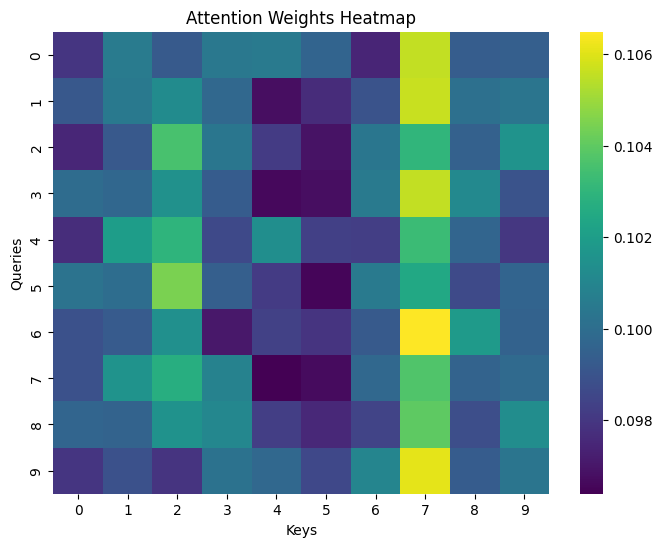

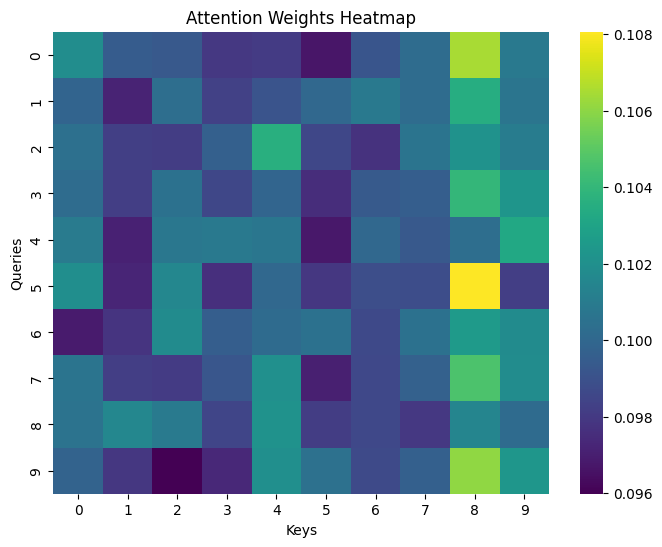

In [137]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameters
d_model = 64   # Embedding dimension
num_heads = 8  # Number of attention heads
seq_len = 10   # Sequence length
batch_size = 2 # Batch size

# Multi-Head Attention Layer
mha = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, batch_first=True)

# Sample Input (Query, Key, Value)
Q = torch.rand(batch_size, seq_len, d_model)
K = torch.rand(batch_size, seq_len, d_model)
V = torch.rand(batch_size, seq_len, d_model)

# Apply Multi-Head Attention
output, attn_weights = mha(Q, K, V, need_weights=True)

print("Output Shape:", output.shape)  # Expected: (batch_size, seq_len, d_model)
print("Attention Weights Shape:", attn_weights.shape)  # Expected: (batch_size, seq_len, seq_len)

def plot_attention_weights(attn_weights, seq_len, batch_idx=0):
    """Visualize the attention weights for a single head."""
    attn_weights = attn_weights[batch_idx].detach().numpy()  # Select first batch item

    plt.figure(figsize=(8, 6))
    sns.heatmap(attn_weights, cmap="viridis", annot=False, xticklabels=range(seq_len), yticklabels=range(seq_len))
    plt.xlabel("Keys")
    plt.ylabel("Queries")
    plt.title("Attention Weights Heatmap")
    plt.show()

# Visualize attention weights - batch_idx=0
plot_attention_weights(attn_weights, seq_len, batch_idx=0)


# Visualize attention weights - batch_idx=1
plot_attention_weights(attn_weights, seq_len, batch_idx=1)